**Prepared by: Tim Hayes**

**Cohort: PGP-DSBA-UTA-AUG'22-A2**

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


#### Observations:

- The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer
- order_id appears to be a unique identifier columns for orders.
- customer_id appears to be unique identifier columns for customers.
- restaurant_name is a column that contains all the restaurant names.
- cuisine_type, day_of_week and rating are categorical columns.
- cost_of_the_order is a float column.
- food_preparation_time and delivery_time at int columns.
- It appears that the categorical column rating has some missing data indicated by 'Not given'

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Use shape() to get the dimensions of the dataframe
df_shape = df.shape
print("DataFrame has {} rows and {} columns".format(df_shape[0], df_shape[1]))

DataFrame has 1898 rows and 9 columns


#### Observations:
- There are 1898 rows and 9 columns in the DataFrame.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- There is one float column, four int columns and four object columns.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Check for missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
- There are no missing values in the DataFrame.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Use describe() to get a statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations:
- order_id and customer_id appear to be unique identifiers.
- The minimum order cost is 4.47 and the maximum is 35.41. 
- The mean order cost is 16.49 and the median is 14.14 which implies the data is right skewed.
- The minimum food_preparation_time is 20 while the maximum is 35.
- The mean food_preparation_time is 27.372 and the median is 27 which implies the data is right skewed.
- The minimum delivery_time is 15 while the maximum is 33.
- The mean delivery_time is 24.162 and the median is 25 which implies the data is slightly left skewed.

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
# See how many ratings were not provided
missing_rating_count = df[df['rating'] == 'Not given']['rating'].count()
missing_rating_percentage = (missing_rating_count/df_shape[0])*100
print("rating column has {} rows of missing ratings which is {:.2f}% of the total ratings"\
      .format(missing_rating_count, missing_rating_percentage))

rating column has 736 rows of missing ratings which is 38.78% of the total ratings


#### Observations:
- There are 736 ratings not provided which is 38.78% of the total data.

### Exploratory Data Analysis (EDA)
- There is no missing data.
- The ratings column is a string with a large portion of the the ratings not provided (38.78%).
- We are not capturing the total time to prepare and deliver the food.
- We have a restaurant_name in the dataset with two different cuisine_type's.
- day_of_the_week can be converted to a bool column so that we can check for correlation with numerical columns.
- It may be useful to bin the cost_of_the_order to see if there are any interesting relationships.

In [8]:
# See if we have an duplicated data
print('Rows of duplicated data in the dataset {}'.format(df.duplicated().sum()))

Rows of duplicated data in the dataset 0


#### Observations:
- There is no duplicated data.

In [9]:
# Add a new column for ratings that converts it to an int
df['rating_numerical'] = df['rating'].copy()
df['rating_numerical'] = pd.to_numeric(df['rating_numerical'],errors='coerce')
df['rating_numerical'].describe()

count   1162.000
mean       4.344
std        0.741
min        3.000
25%        4.000
50%        5.000
75%        5.000
max        5.000
Name: rating_numerical, dtype: float64

#### Observations:
- Minimum rating is 3.
- Maximum rating is 5.
- Average rating is 4.344.
- Mean of 4.344 is less then median of 5 thus the data is left skewed.

In [10]:
# Calculate the total time to prepare and deliver the food
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df['total_time'].describe()

count   1898.000
mean      51.534
std        6.834
min       35.000
25%       47.000
50%       52.000
75%       56.000
max       68.000
Name: total_time, dtype: float64

#### Observations:
- Average total time to prepare and deliver food is 51.534 min.
- Min total_time to is to prepare and deliver food 35 min.
- Max total_time to is to prepare and deliver food 68 min.
- Mean of 51.534 is less then median of 52 thus the data is left skewed.

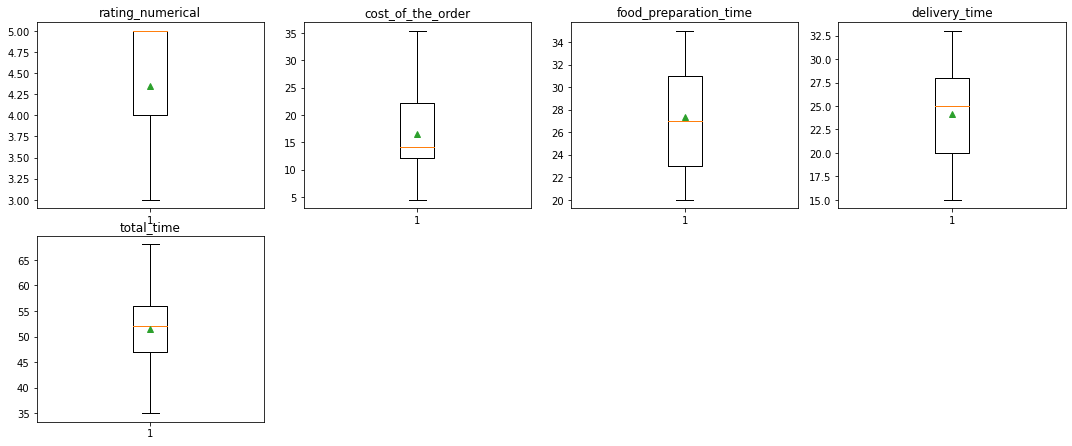

In [11]:
# outlier detection using boxplot
# selecting the numerical columns where outliers were treated 
numeric_columns = ['rating_numerical','cost_of_the_order','food_preparation_time','delivery_time', 'total_time']
plt.figure(figsize=(15, 12))

# Iterate over the the numerical columns and render boxplots
for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[df[variable].notnull()][variable], whis=1.5,showmeans=True)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations:
- There are no outliers to deal with in our dataset.

In [12]:
# Find out if we have duplicated restaurants with different cuisine_types

# Output the unique number of restaurants
print('There are {} nunique restarants'.format(df['restaurant_name'].nunique()))

# Group the dataframe by restaurant_name and cuisine_type
restaurant_counts_df = df.groupby(['restaurant_name','cuisine_type'])[['restaurant_name','cuisine_type']]\
                        .size().reset_index(name='count')\
                        .sort_values(by='count',ascending=False).copy()
# Output the number of groups
print('There are {} restaurant cuisine pairs'.format(len(restaurant_counts_df)))
print('\nDuplicated restuarant/cuisine_type pairs')
# Output the duplicate rows
print(restaurant_counts_df[restaurant_counts_df['restaurant_name'].duplicated(keep=False)])

There are 178 nunique restarants
There are 179 restaurant cuisine pairs

Duplicated restuarant/cuisine_type pairs
       restaurant_name cuisine_type  count
154  The Meatball Shop      Italian    112
153  The Meatball Shop     American     20


#### Observations:
- We find that 'The Meatball Shop' restaurant is listed under both Italian and American as cuisine_type. It is likely that the cuisine_type of American is a typo which should be investigated.

In [13]:
# Calculate a boolean weekend 1/0 column
df['weekend'] = df['day_of_the_week'].apply(lambda x: 1 if x == 'Weekend' else 0)

In [14]:
# Slice up the cost_of_the_order columns into bins using the pd.cut command
df['cost_of_the_order_bins'] = pd.cut(df['cost_of_the_order'],bins=[0,5,10,15,20,25,30,35],\
                                        labels=['0-4.99','5-10','10.01-15','15.01-20', '20.01-25','25.01-30','30.01-35'], \
                                        right = True)

In [15]:
# Lets do an updated describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000
rating_numerical,1162.000,4.344,0.741,3.000,4.000,5.000,5.000,5.000
total_time,1898.000,51.534,6.834,35.000,47.000,52.000,56.000,68.000
weekend,1898.000,0.712,0.453,0.000,0.000,1.000,1.000,1.000


#### Observations:
- Weekend orders comprise 71.2% of all orders.

### Utility functions

In [16]:
def output_pretty_boxplot(title, df, x, y=None, hue=None, figsize=None):
    '''Output a customized nice looking standardized boxplot
        :title: the title desired in the plot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :y: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default to nNone
        :figsize: The figurare size tuple to use in the plot default is None
    ''' 
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(10,3);      
        
    plt.figure(figsize=figsize);
    
    # Output boxplot with variables
    sns.boxplot(data=df,x=x, y=y, showmeans=True, hue=hue);

    plt.title(title);    
    
def output_pretty_countplot(title, df, x, order=None, hue=None, figsize=None):
    '''Output a customized nice looking standardized countplot
        :title: the title desired in the plot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :order: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default is None
        :figsize: The figure size tuple to use in the plot default is None
    ''' 
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(15,3.5);
        
    plt.figure(figsize=figsize);
        
    plt.xticks(rotation=45);
    plt.rcParams["figure.figsize"] = [7.0, 3.5]
    plt.rcParams["figure.autolayout"] = True
       
    # Ouput count plot
    ax = sns.countplot(data=df,x=x,order=order,hue=hue);           
        
    # output the amounts on top of the bars
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + (p.get_height()*0.01)
        value = '{:.1f}'.format(p.get_height())
        ax.text(x, y, value, ha="center")

    plt.title(title);
    plt.show();
    
def output_pretty_histplot(title, df, x):
    '''Output a customized nice looking standardized histplot
        :title: the title desired in the plot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
    '''
       
    plt.figure(figsize=(10,3));
    sns.histplot(data=df,x=x,kde=True);
    plt.title(title);
    plt.show();

def output_pretty_barplot(title, df, x, y, order=None):
    '''Output a customized nice looking standardized barplot
        :title: the title desired in the plot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :y: The y axis variable to use in the plot
        :order: The y axis variable to use in the plot default is None
    ''' 

    g = sns.catplot(data=df,x=x,y=y,kind='bar',order=order);
     
    g.fig.set_size_inches(15, 4)
    g.fig.subplots_adjust(top=0.81, right=0.86)

    # extract the matplotlib axes_subplot objects from the FacetGrid
    ax = g.facet_axis(0, 0)

    # iterate through the axes containers and add amount to bar
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    
    plt.title(title);
    plt.xticks(rotation=45);

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Lets investigate order_id

In [17]:
# check unique order ID
print('There are {} unique orders'.format(df['order_id'].nunique()))

There are 1898 unique orders


##### Observations:
- order_id is a unique identifier that unique count matches the number of rows.

#### Lets investigate customer_id

There are 1200 unique customers
Total orders for the top 20 customers was 134 which is 7.06% of the total orders


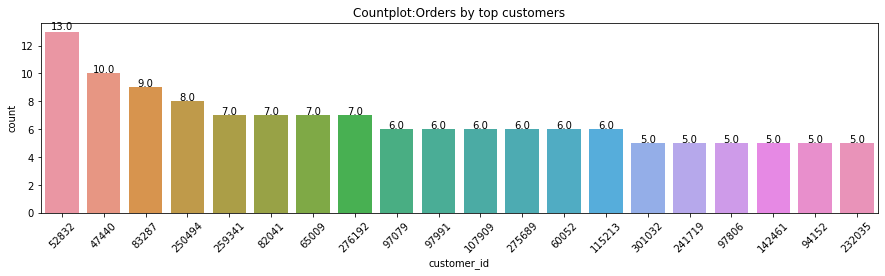

In [18]:
# check unique customer ID
unique_customers = df['customer_id'].nunique()
print('There are {} unique customers'.format(unique_customers))

# Find the top 20 customers by order count
order_counts = df['customer_id'].value_counts() 
top_orderers = order_counts.head(20)
top_orderers_sum = top_orderers.values.sum()
top_orderers_percentage = (top_orderers_sum/df_shape[0])*100
print('Total orders for the top 20 customers was {} which is {:.2f}% of the total orders'\
      .format(top_orderers_sum, top_orderers_percentage))
# countplot for for the top 20 orderers
output_pretty_countplot('Countplot:Orders by top customers',df[df['customer_id'].isin(top_orderers.index)],\
                        x='customer_id',order = top_orderers.index);

##### Observations:
- The total unique customers are 1200.
- The top twenty (1.6% of total customers) most frequent orderers had 134 of the total orders which is 7.06% of all the orders.
- Customer_id 52832 had the most orders with 13.

#### Lets investigate restaurant_name column

There are 178 unique restaurants

Top 10 restaurant order details
                   restaurant_name cuisine_type  count  % of total
136                    Shake Shack     American    219      11.538
21               Blue Ribbon Sushi     Japanese    119       6.270
154              The Meatball Shop      Italian    112       5.901
20       Blue Ribbon Fried Chicken     American     96       5.058
109                           Parm      Italian     68       3.583
121               RedFarm Broadway      Chinese     59       3.109
122                 RedFarm Hudson      Chinese     55       2.898
145                            TAO     Japanese     49       2.582
66                     Han Dynasty      Chinese     46       2.424
22   Blue Ribbon Sushi Bar & Grill     Japanese     44       2.318

Out of 178 unique restaurants the top 10 in terms of orders have 867 orders which comprises 45.68% of all orders


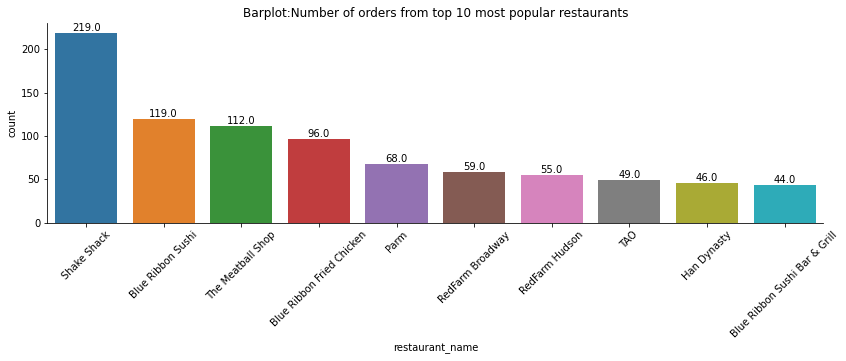

In [19]:
# check unique Restaurant Name
unique_restaurants = df['restaurant_name'].nunique()
print('There are {} unique restaurants\n'.format(unique_restaurants))

# Group by restaurant_name and cuisine_type to gather order counts for each restaurant/cuisine_type
restaurant_counts = df.groupby(['restaurant_name','cuisine_type'])[['restaurant_name','cuisine_type']]\
                        .size().reset_index(name='count')\
                        .sort_values(by='count',ascending=False)

# Output the top 10 restaurants along with their contributions towards total orders
top_10_restaurant_counts = restaurant_counts.head(10).copy()

# Calculate the total unique restaurants and % contribution by restaurant_name
restaurant_counts_sum = restaurant_counts['count'].sum()
top_10_restaurant_counts_sum = top_10_restaurant_counts['count'].sum()
top_10_restaurant_counts['% of total'] = (top_10_restaurant_counts['count']/restaurant_counts_sum)*100

print('Top 10 restaurant order details')
print(top_10_restaurant_counts)

top_10_restaurant_counts_percentage = (top_10_restaurant_counts_sum/df_shape[0]) * 100
print('\nOut of {} unique restaurants the top 10 in terms of orders have {} orders which comprises {:.2f}% of all orders'\
      .format(unique_restaurants,top_10_restaurant_counts_sum, top_10_restaurant_counts_percentage))

# Barplot for restaurant_name
output_pretty_barplot('Barplot:Number of orders from top 10 most popular restaurants',\
                     top_10_restaurant_counts,'restaurant_name','count');

##### Observations:
- There are 178 unique restaurants.
- The top 10 restaurants (5.6% of total restaurants) in terms of orders have 45.68% of the total orders.
- The top restaurant by orders is Shake Shake with about 219 orders which represents 11.54% of the total orders.
- The cuisine_type for the top 10 restaurants are comprised of 3 Japanese, 3 Chinese, 2 American and 2 Italian.

#### Lets investigate cuisine_type column

There are 14 unique cuisine types

American         0.308
Japanese         0.248
Italian          0.157
Chinese          0.113
Mexican          0.041
Indian           0.038
Middle Eastern   0.026
Mediterranean    0.024
Thai             0.010
French           0.009
Southern         0.009
Korean           0.007
Spanish          0.006
Vietnamese       0.004
Name: cuisine_type, dtype: float64


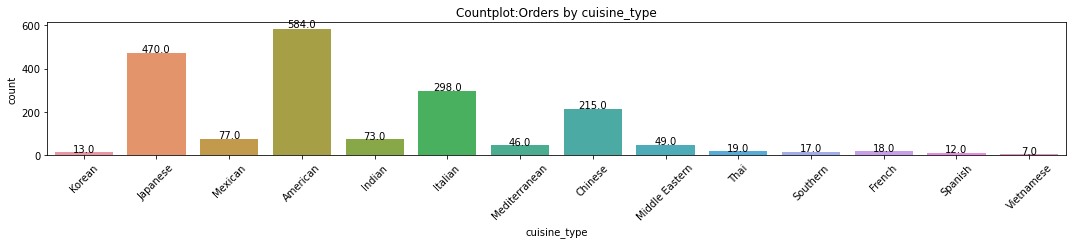

In [20]:
# Unique cuisine_types
unique_cuisines = df['cuisine_type'].nunique()
print('There are {} unique cuisine types\n'.format(unique_cuisines))
# output distribiution of cuisine_type
print(df['cuisine_type'].value_counts(normalize=True))
# countplot for cuisine_type
output_pretty_countplot('Countplot:Orders by cuisine_type', df, 'cuisine_type')

##### Observations:
- There are 14 unique cuisine types.
- American is the top cuisine_type based on order count of 584 followed by Japanese with 470 and Italian with 298.
- American cuisine represents 30.8% of total orders
- All of top 4 cuisine_type's are represented in the top 10 restaurant list above.
- The top 4 cuisines represents 82.6% of all orders.

#### Lets investigate day_of_the_week column

Weekend   0.712
Weekday   0.288
Name: day_of_the_week, dtype: float64


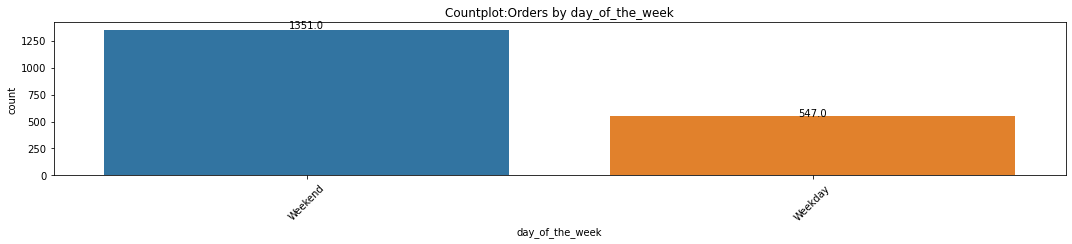

In [21]:
# output distribiution of day_of_the_week
print(df['day_of_the_week'].value_counts(normalize=True))
# countplot for day_of_the_week
output_pretty_countplot('Countplot:Orders by day_of_the_week', df, 'day_of_the_week')

##### Observations:
- Orders on the weekend are 1351 representing 71.2% of total orders.
- Orders for the weekdays are 547 representing 28.8% or total orders.

#### Lets investigate rating/rating_numerical column

Not given   0.388
5           0.310
4           0.203
3           0.099
Name: rating, dtype: float64


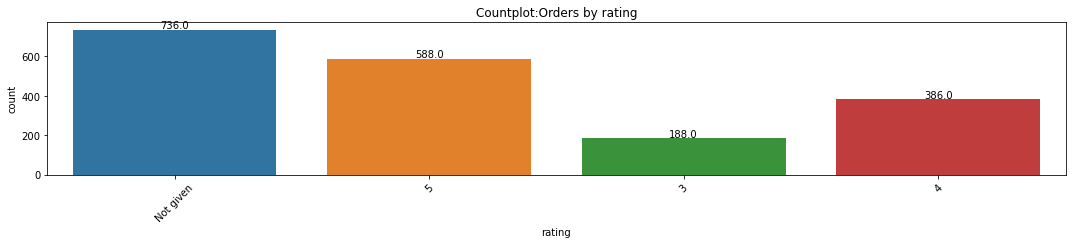

In [22]:
# output distribiution of rating
print(df['rating'].value_counts(normalize=True))
# countplot for rating
output_pretty_countplot('Countplot:Orders by rating', df, 'rating')

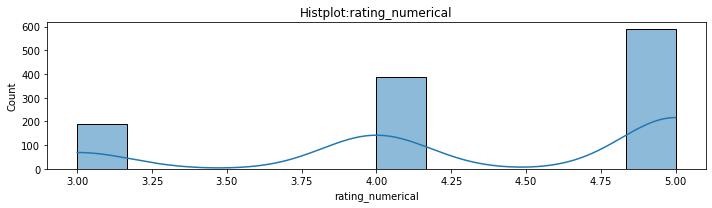

In [23]:
# histplot for rating_numerical
output_pretty_histplot('Histplot:rating_numerical', df, 'rating_numerical');

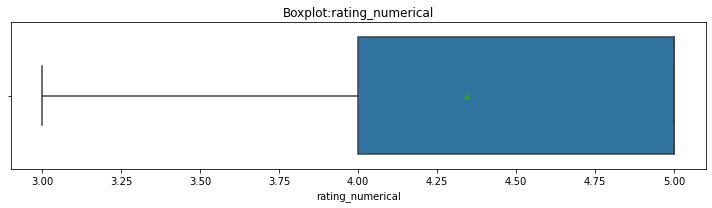

In [24]:
# boxplot for rating_numerical
output_pretty_boxplot('Boxplot:rating_numerical', df, x='rating_numerical')

##### Observations:
- Min rating is 3 while the max is 5.
- The mean of 4.344 is greater then the median indicating the data is right skewed.
- The number of Not given was the highest at 736 representing 38.8% of ratings.
- The rating of 5 was second highest with 588 ratings representing 31.0% of ratings.

#### Lets investigate cost_of_the_order/cost_of_the_order_bins column

In [25]:
# Calcuylate the total cost of all orders as well as the mean
cost_of_all_orders = df['cost_of_the_order'].sum()
average_cost_of_all_orders = df['cost_of_the_order'].mean()
print('Total cost of orders for all cuisines and restaurants is {:.2f} with an average cost of {:.2f}'\
      .format(cost_of_all_orders, average_cost_of_all_orders))

Total cost of orders for all cuisines and restaurants is 31314.82 with an average cost of 16.50


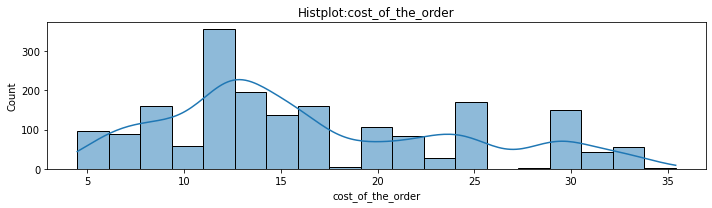

In [26]:
# histplot for cost_of_the_order
output_pretty_histplot('Histplot:cost_of_the_order', df, 'cost_of_the_order')

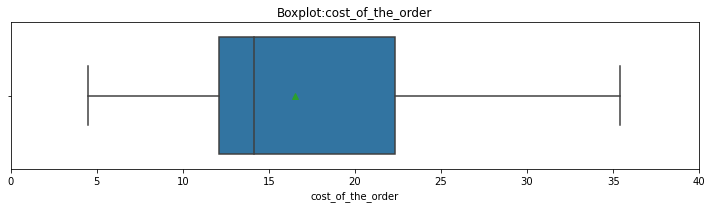

In [27]:
# boxplot for cost_of_the_order
output_pretty_boxplot('Boxplot:cost_of_the_order', df, x='cost_of_the_order')
plt.xlim(0,40);

10.01-15   0.324
5-10       0.203
15.01-20   0.177
20.01-25   0.132
25.01-30   0.108
30.01-35   0.052
0-4.99     0.005
Name: cost_of_the_order_bins, dtype: float64


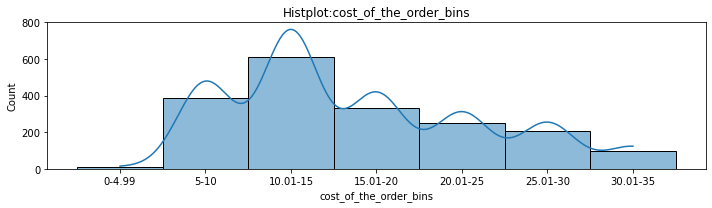

In [28]:
# output distribution for cost_of_the_order_bins
print(df['cost_of_the_order_bins'].value_counts(normalize=True))
# histplot for cost_of_the_order_bins
output_pretty_histplot('Histplot:cost_of_the_order_bins', df, 'cost_of_the_order_bins')

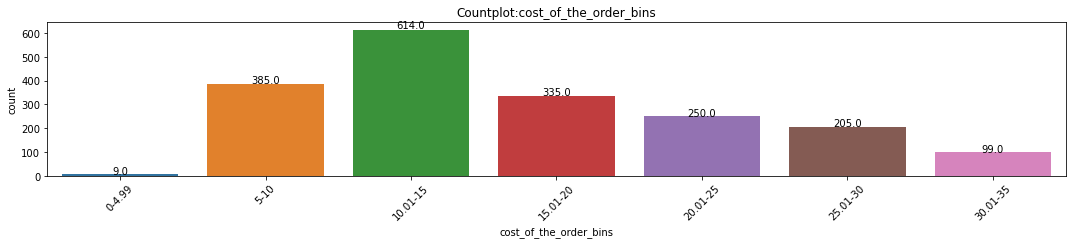

In [29]:
# countplot for cost_of_the_order_bins
output_pretty_countplot('Countplot:cost_of_the_order_bins', df, 'cost_of_the_order_bins')

##### Observations:
- Total cost of all orders was 31314.82 with an average order cost of 16.50.
- This data has one large peak.
- Mean is 16.50 which is greater the the median implying a right skew in this column.
- The top three cost_of_the_order bins are 10.01-15 with an order count of 614, 5-10 with an order count of 385 and 15.01-20 with an order count of 335.
- The most populated bin of 10.01-15 represents 32.34% of all orders.
- The top 3 populated bins 5-10, 10.01-15 and 15.01-20 represent 70.28% of all orders.

#### Lets investigate food_preparation_time column

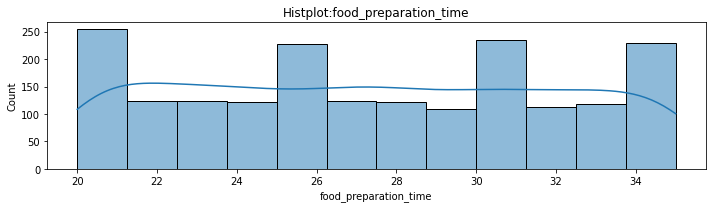

In [30]:
# histplot for food_preparation_time
output_pretty_histplot('Histplot:food_preparation_time', df, 'food_preparation_time')

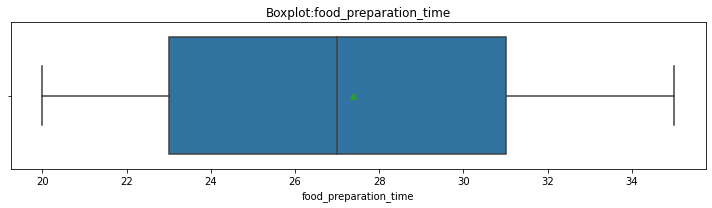

In [31]:
# boxplot for food_preparation_time
output_pretty_boxplot('Boxplot:food_preparation_time', df, x='food_preparation_time')

##### Observations:
- Minimum is 20 and the maximum is 35 for food_preparation_time.
- Mean is 27.372 which is greater than the median indicating this column is slightly right skewed.
- This data is multimodal with four peaks.

#### Lets investigate delivery_time column

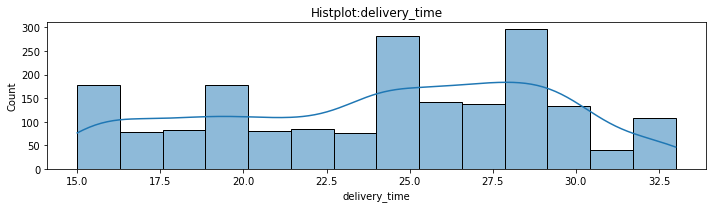

In [32]:
# histplot for delivery_time
output_pretty_histplot('Histplot:delivery_time', df, 'delivery_time')

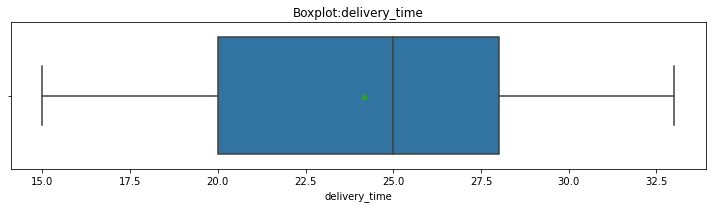

In [33]:
# boxplot for delivery_time
output_pretty_boxplot('Boxplot:delivery_time', df, x='delivery_time')

##### Observations:
- Minimum is 15 and maximum is 33 for delivery_time.
- Mean is 24.162 which is less then the median implying delivery_time is left skewed.
- This data has two large peaks which could indicate restaurants within that delivery time distance are popular and most frequented by many customers.

#### Lets investigate total_time column

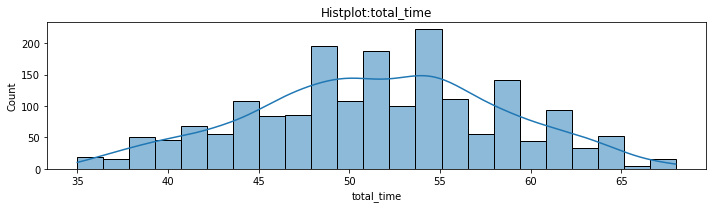

In [34]:
# histplot for total_time
output_pretty_histplot('Histplot:total_time', df, 'total_time');

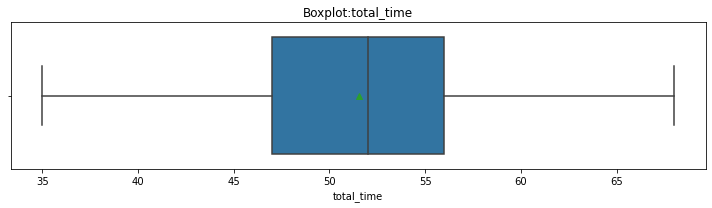

In [35]:
# boxplot for total_time
output_pretty_boxplot('Boxplot:total_time', df, 'total_time');

##### Observations:
- Minimum is 35 and maximum is 68.
- Mean is 51.534 which is slightly less then the median implying this column is left skewed.
- This column is mulimodal with three clear peaks. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [36]:
# Group by restaurant count and order results descending
df.groupby('restaurant_name')[['restaurant_name']]\
    .size()\
    .reset_index(name='count')\
    .sort_values(by='count',ascending=False)\
    .head(5)

,restaurant_name,count
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68


#### Observations:
- The top five restaurants in terms of orders received comprise 33.4% of all orders.
- Shake Shack had the most orders of 219 of the top five restaurants.
- Parm had the fewest orders of 68 of the top five restaurants.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [37]:
# Filter on Weekends then group by cuisine_type count and order results descending
popular_cuisine_by_weekends_df = df[df['day_of_the_week'] == "Weekend"].groupby('cuisine_type')[['cuisine_type']]\
    .size().reset_index(name='count')\
    .sort_values(by='count',ascending=False)
popular_cuisine_by_weekends_count = popular_cuisine_by_weekends_df['count'].sum()
popular_cuisine_by_weekends_df['% of total weekend orders'] = (popular_cuisine_by_weekends_df['count']/\
                                                               popular_cuisine_by_weekends_count) * 100
print(popular_cuisine_by_weekends_df.head(5))


  cuisine_type  count  % of total weekend orders
0     American    415                     30.718
5     Japanese    335                     24.796
4      Italian    207                     15.322
1      Chinese    163                     12.065
8      Mexican     53                      3.923


#### Observations:
- American is the most popular cuisine on the weekends with 415 orders representing 30.718% of weekend orders.

#### Find out the most popular cuisine for weekdays

In [38]:
# Filter on Weekday then group by cuisine_type count and order results descending
popular_cuisine_by_weekdays_df = df[df['day_of_the_week'] == "Weekday"].groupby('cuisine_type')[['cuisine_type']]\
    .size().reset_index(name='count')\
    .sort_values(by='count',ascending=False)
popular_cuisine_by_weekdays_count = popular_cuisine_by_weekdays_df['count'].sum()
popular_cuisine_by_weekdays_df['% of total weekday orders'] = (popular_cuisine_by_weekdays_df['count']/\
                                                               popular_cuisine_by_weekdays_count) * 100
print(popular_cuisine_by_weekdays_df.head(5))

  cuisine_type  count  % of total weekday orders
0     American    169                     30.896
5     Japanese    135                     24.680
4      Italian     91                     16.636
1      Chinese     52                      9.506
3       Indian     24                      4.388


#### Observations:
- American is the most popular cuisine on the weekdays with 169 orders representing 30.896% of weekday orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [39]:
# Filter out the orders costing greater then 20
orders_over_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].count()
# Divide by all orders to get the percentage of orders > 20
orders_over_20_percentage = (orders_over_20/df_shape[0])*100
print("Number of orders over 20 is {} which is {:.2f}% of the total orders"\
      .format(orders_over_20, orders_over_20_percentage))

Number of orders over 20 is 555 which is 29.24% of the total orders


#### Observations:
- The numbers of orders over 20 is 555 which represents 29.24% of total orders.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [40]:
# Calulate the average delivery time
average_delivery_time = df['delivery_time'].mean()
print('Average delivery time is {:.2f}'.format(average_delivery_time))

Average delivery time is 24.16


#### Observations:
- The average delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [41]:
# Group by customer_id then sort in descending order and take the top 3 customers
df.groupby('customer_id').size()\
    .reset_index(name='order count')\
    .sort_values(by='order count', ascending=False).head(3)

,customer_id,order count
116,52832,13
84,47440,10
333,83287,9


#### Observations:
- customer_id 52832 is first with 13 orders followed by customer_id 47440 with 10 orders and customer_id 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Lets investigate all numerical and boolean variables

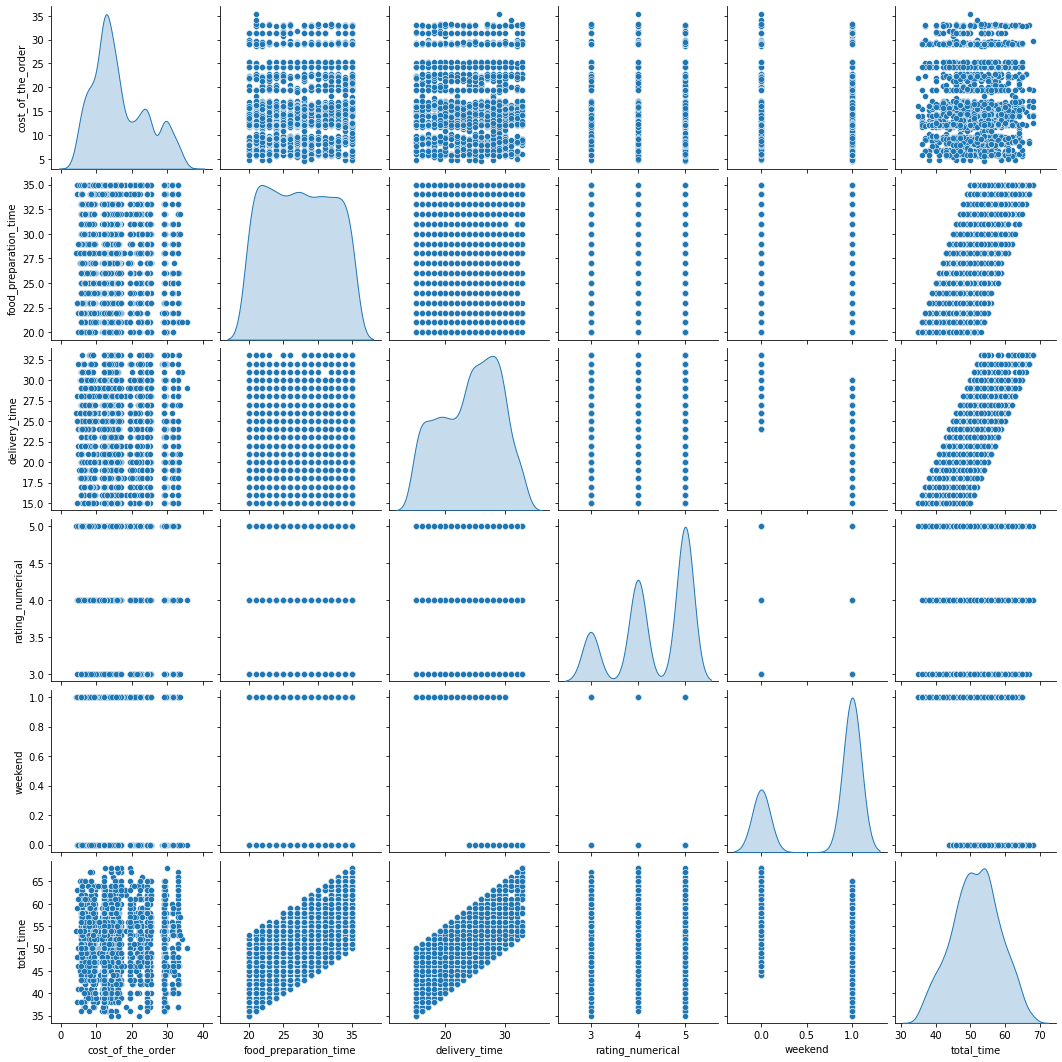

In [42]:
# Pair plot all the numerical variables
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating_numerical', 'weekend',\
                 'total_time']], diag_kind="kde");

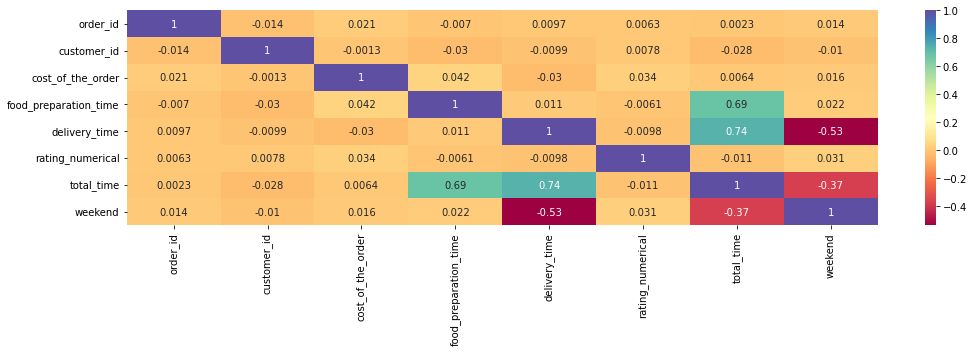

In [43]:
# Determine correlation between numerical variables
plt.figure(figsize=(15,5))
sns.heatmap(data=df.corr(), annot=True, cmap='Spectral');
plt.xticks(rotation=90);

##### Observations:
- total_time has a high correlation with delivery_time and food_preparation_time since it was derived from these values.
- weekend has a negative correlation -.37 with total_time.
- weekend has a negative correlation -.53 with delivery_time.
- No other correlations fit the rule of thumb where -.2 => c >= .2.

#### Lets investigate restaurants in each cuisine_type

      cuisine_type  cuisine type count  % of total
0         American                  41      23.034
1          Italian                  31      17.416
2         Japanese                  29      16.292
3          Chinese                  16       8.989
4           Indian                  14       7.865
5          Mexican                  11       6.180
6             Thai                   9       5.056
7   Middle Eastern                   7       3.933
8    Mediterranean                   5       2.809
9           Korean                   5       2.809
10          French                   3       1.685
11         Spanish                   3       1.685
12      Vietnamese                   3       1.685
13        Southern                   2       1.124


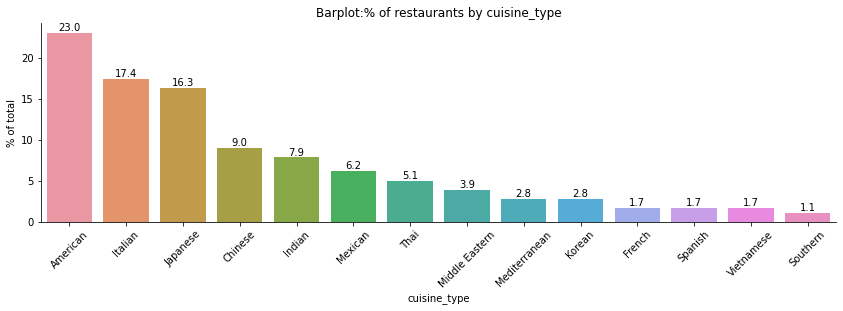

In [44]:
# Group by 'restaurant_name','cuisine_type' to find restaurants per cuisine_type
unique_restaurants_group_head = df.groupby(['restaurant_name','cuisine_type'])\
                                    [['restaurant_name','cuisine_type']].first()

unique_restaurants_df = unique_restaurants_group_head['cuisine_type'].value_counts()\
                    .rename_axis('cuisine_type')\
                    .reset_index(name='cuisine type count')\
                    .copy()
unique_restaurants_df['% of total'] = (unique_restaurants_df['cuisine type count']/unique_restaurants)*100
print(unique_restaurants_df)
output_pretty_barplot('Barplot:% of restaurants by cuisine_type', unique_restaurants_df, \
                      x='cuisine_type', y='% of total')

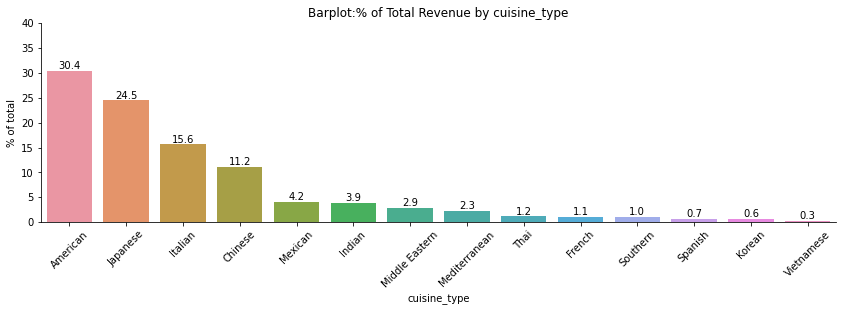

In [45]:
# Group by cuisine_type and find the Cost_of_the_order per cuisine
cost_of_the_order_by_cuisine_df = df.groupby('cuisine_type')['cost_of_the_order'].sum().reset_index()\
                                        .sort_values(by='cost_of_the_order',ascending=False)
cost_of_the_order_by_cuisine_df = cost_of_the_order_by_cuisine_df.rename(columns={"cost_of_the_order": \
                                                                                  "total_cost_of_the_order"})
# Calculate the % contribution to total revnue by cuisine
cost_of_the_order_by_cuisine_df['% of total'] = (cost_of_the_order_by_cuisine_df[ "total_cost_of_the_order"]\
                                                 /cost_of_all_orders)*100

# Output total revenue by cost_of_the_order
output_pretty_barplot('Barplot:% of Total Revenue by cuisine_type',\
                        cost_of_the_order_by_cuisine_df, \
                        'cuisine_type', '% of total', \
                        cost_of_the_order_by_cuisine_df['cuisine_type'].value_counts().index);
plt.ylim(0,40);

##### Observations:
- The top number of restaurants for cuisine_type overall is American with 41 restaurants representing 23.034% of all restaurants although American brings in 30.4% of the total restaurant revenue.
- Japanese has 29 restaurants which is 16.292% of all restaurants although Japanese brings in 24.5% of the total restaurant revenue.
- Based on the top 4 cuisine_type's American, Japanese, Italian and Chinese it seems like more restaurants should be added for American and Japanese cuisine_types to more closely match the popularity based on revenue.

#### Lets investigate repeat customers at restaurants

                  restaurant_name  count
26                    Shake Shack      9
6               Blue Ribbon Sushi      7
5       Blue Ribbon Fried Chicken      6
7   Blue Ribbon Sushi Bar & Grill      4
32              The Meatball Shop      4
22                 Nobu Next Door      3
25                 RedFarm Hudson      3


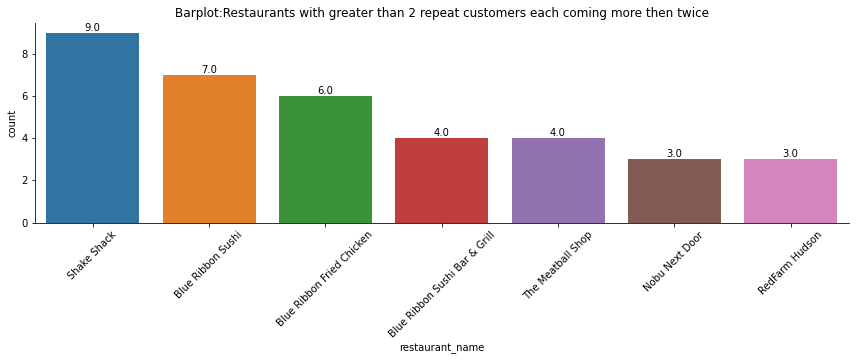

In [46]:
# Group by restaurant and customer_id and take only those in the group that contain customers who are repeat customers 
# > 2 times
repeat_customer_restaurants = df.groupby(['restaurant_name','customer_id']).size()\
        .reset_index(name='count')\
        .sort_values(by=['count','restaurant_name'],ascending=False)
repeat_customer_restaurants = repeat_customer_restaurants[repeat_customer_restaurants['count'] > 2]

# Now we groupby restaurant_name amd count the items in each of the buckets to indicate
# number of repeat customer per restaurant name that have returned more then twice
repeat_customer_restaurants = repeat_customer_restaurants\
        .groupby('restaurant_name')['count']\
        .size()\
        .reset_index(name='count')

# Finally lets filter the dataframe for only those restaurants that have two or more repeat customers
top_repeat_customer_restaurants = repeat_customer_restaurants[repeat_customer_restaurants['count'] > 2]\
        .sort_values(by=['count'],ascending=False)

print(top_repeat_customer_restaurants)

# Output barplot showing Restaurants with greater than 2 repeat customers each coming more then twice
output_pretty_barplot('Barplot:Restaurants with greater than 2 repeat customers each coming more then twice', \
                      top_repeat_customer_restaurants, x='restaurant_name',y='count');

##### Observations:
- There are seven restaurants that have more then two customers that have returned more then twice.
- Shake Shake has 9 repeat customers who have frequented the restaurant more then twice.
- The top three restaurants with most repeat visits are Shake Shack, Blue Ribbon Sushi and Blue Ribbon Fried Chicken.
- Of the top three restaurants based on repeat visits two of them are American cuisine and one is Japanese.

#### Lets investigate cuisine_type orders in relation to day_of_the_week

Distribution of all cuisine orders
      cuisine_type  count  % of overall total
0         American    584              30.769
5         Japanese    470              24.763
4          Italian    298              15.701
1          Chinese    215              11.328
8          Mexican     77               4.057
3           Indian     73               3.846
9   Middle Eastern     49               2.582
7    Mediterranean     46               2.424
12            Thai     19               1.001
2           French     18               0.948
10        Southern     17               0.896
6           Korean     13               0.685
11         Spanish     12               0.632
13      Vietnamese      7               0.369

Cuisine orders by weekend totaling 1351
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean        

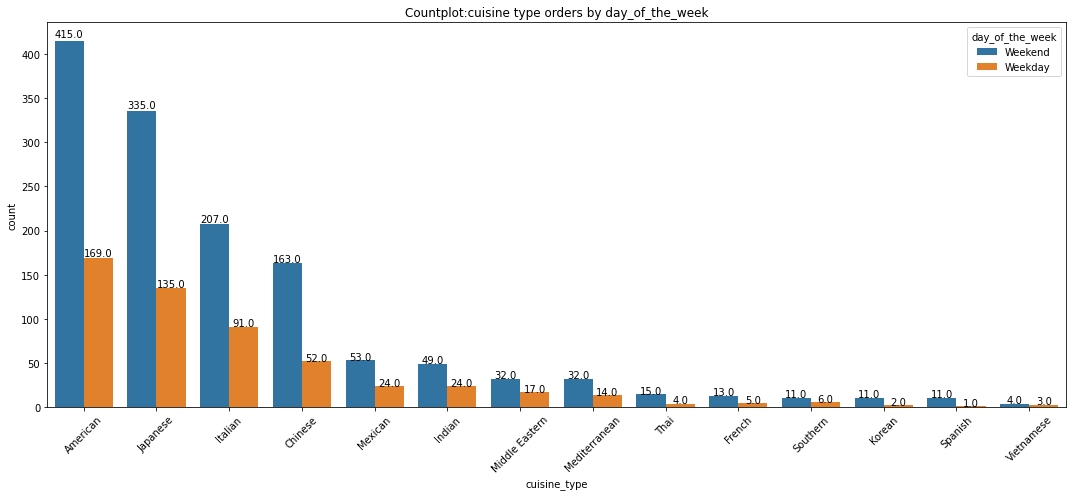

In [47]:
print('Distribution of all cuisine orders')
# Group by cuisine_type to see count and % of orders by cuisine
cuisine_type_distribution_df = df.groupby(['cuisine_type'])['cuisine_type'].size().reset_index(name='count')\
                                       .sort_values(by='count',ascending=False)
# Calculate the % contribution by cuisine
cuisine_type_distribution_df['% of overall total'] = (cuisine_type_distribution_df['count']/df_shape[0])*100

# now break down cuisine orders by day of the week
print(cuisine_type_distribution_df)
print('\nCuisine orders by weekend totaling {}'.format(df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].count()))
print(df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts())
print('\nCuisine orders by weekday totaling {}'.format(df[df['day_of_the_week'] == 'Weekday']['cuisine_type'].count()))
print(df[df['day_of_the_week'] == 'Weekday']['cuisine_type'].value_counts())

# Countplot of cuisine_type by day of the week
output_pretty_countplot('Countplot:cuisine type orders by day_of_the_week', df, \
                        x='cuisine_type', hue='day_of_the_week',\
                        order=df['cuisine_type'].value_counts().index,\
                        figsize=(15,7))

##### Observations:
- Weekend orders surpass weekday orders by 146.98%.
- American cuisine makes up 30.769% of all orders.
- Top 4 cuisines for weekends are American 415 orders, Japanese 355 orders, Italian 207 orders, Chinese 163 orders.
- Top 4 cuisines for weekdays are American 169 orders, Japanese 135 orders, Italian 91 orders and Chinese 52 orders.

#### Lets investigate cuisine_type orders in relation to cost of the order on weekends

Weekend stats cost_of_the_order by cuisine_type
                 count   mean   std    min    25%    50%    75%    max
cuisine_type                                                          
American       415.000 16.732 7.573  4.710 12.130 14.460 22.775 33.180
Japanese       335.000 16.279 7.484  4.470 11.740 14.120 20.350 33.370
Italian        207.000 16.211 7.409  5.050 11.690 14.120 21.930 33.030
Chinese        163.000 16.036 7.357  4.750 12.105 14.120 21.075 33.030
Mexican         53.000 17.104 7.308  4.850 12.130 15.570 22.310 31.380
Indian          49.000 16.801 7.592  5.340 12.130 16.150 22.260 33.030
Mediterranean   32.000 16.103 7.425  5.770 12.117 14.045 20.312 32.930
Middle Eastern  32.000 18.283 8.033  5.770 12.877 16.150 25.195 32.930
Thai            15.000 20.207 7.635  9.460 13.170 19.350 26.625 32.930
French          13.000 19.382 6.690 12.130 12.230 19.690 21.930 29.250
Korean          11.000 14.333 8.238  5.770 10.045 12.230 14.045 30.750
Southern        11.000 19.341

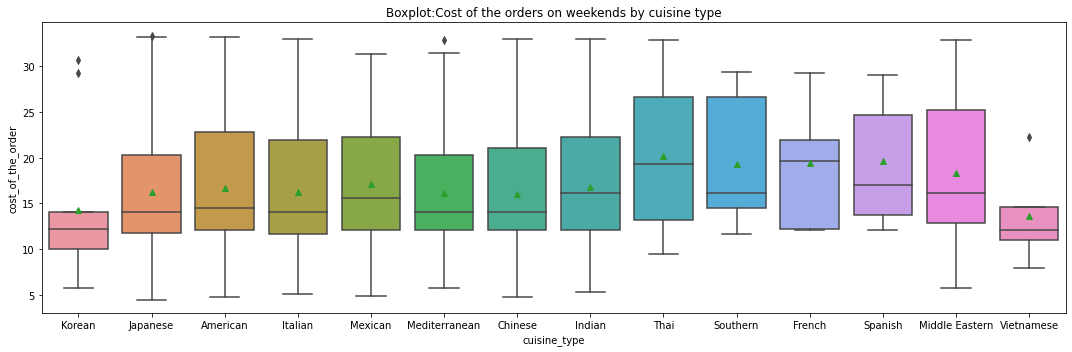

In [48]:
# output stats for cost_of_the_order for weekend orders
weekend_cuisine_stats = df[df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type')['cost_of_the_order']\
                            .describe()
print('Weekend stats cost_of_the_order by cuisine_type')
print(weekend_cuisine_stats.sort_values(by='count', ascending=False))

# Boxplot cuisine_type orders in relation to cost of the order on weekends
output_pretty_boxplot('Boxplot:Cost of the orders on weekends by cuisine type', \
                      df[df['day_of_the_week'] == 'Weekend'], x='cuisine_type', y='cost_of_the_order',\
                     figsize=(15,5));

##### Observations:
- Korean, Mediterranean and Vietnamese cuisines have outliers on weekends.
- Thai has the highest average price on weekends.
- Southern, Spanish, Thai,Vietnamese, French and Korean have less then twenty orders each for weekends.


- Koren cuisine on weekends has a mean of 14.33 which is greater than the median suggesting the data is right skewed.
- Japanese cuisine on weekends has a mean of 16.279 which is greater than the median suggesting the data is right skewed.
- American cuisine on weekends has a mean of 16.732 which is greater than the median suggesting the data is right skewed.
- Italian cuisine on weekends has a mean of 16.211 which is greater than the median suggesting the data is right skewed.
- Mexican cuisine on weekends has a mean of 17.104 which is greater than the median suggesting the data is right skewed.
- Mediterranean cuisine on weekends has a mean of 16.103 which is greater than the median suggesting the data is right skewed.
- Chinese cuisine on weekends has a mean of 16.036 which is greater than the median suggesting the data is right skewed.
- Indian cuisine on weekends has a mean of 16.801 which is greater than the median suggesting the data is right skewed.
- Thai cuisine on weekends has a mean of 20.207 which is greater than the median suggesting the data is right skewed.
- Southern cuisine on weekends has a mean of 19.341 which is greater than the median suggesting the data is right skewed.
- French cuisine on weekends has a mean of 19.382 which is less than the median suggesting the data is left skewed.
- Spanish cuisine on weekends has a mean of 19.618 which is greater than the median suggesting the data is right skewed.
- Middle Eastern cuisine on weekends has a mean of 18.283 which is greater than the median suggesting the data is right skewed.
- Vietnamese cuisine on weekends has a mean of 13.607 which is greater than the median suggesting the data is right skewed.

#### Lets investigate cuisine_type orders in relation to cost of the order on weekdays

Weekday stats cost_of_the_order by cuisine_type
                 count   mean    std    min    25%    50%    75%    max
cuisine_type                                                           
American       169.000 15.308  7.105  4.750  9.600 14.070 19.740 33.030
Japanese       135.000 16.368  7.295  4.900 12.130 14.020 21.975 33.370
Italian         91.000 16.890  6.957  6.740 12.105 14.650 22.505 32.980
Chinese         52.000 17.148  8.456  5.670 12.117 14.095 24.212 34.190
Indian          24.000 17.162  8.652  5.670  9.157 15.980 24.555 32.980
Mexican         24.000 16.556  8.224  5.920 11.498 13.580 24.300 33.320
Middle Eastern  17.000 19.833  8.336  6.020 13.730 19.450 25.270 31.430
Mediterranean   14.000 14.040  8.096  5.670  8.062 13.485 15.538 35.410
Southern         6.000 19.227 10.080  7.380 12.230 17.270 27.913 31.430
French           5.000 20.866  6.617 11.980 16.980 22.020 24.200 29.150
Thai             4.000 15.463  6.997  6.690 11.460 16.615 20.617 21.930
Vietnamese      

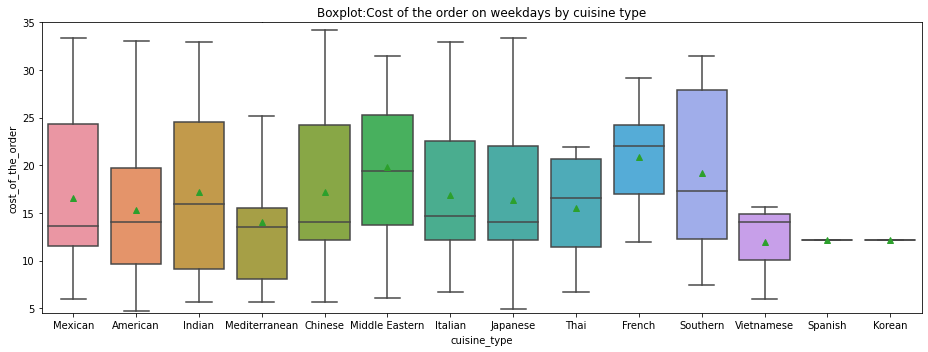

In [49]:
# output stats for cost_of_the_order for weekday orders
weekday_cuisine_stats = df[df['day_of_the_week'] == 'Weekday'].groupby('cuisine_type')['cost_of_the_order'].describe()
print('Weekday stats cost_of_the_order by cuisine_type')
print(weekday_cuisine_stats.sort_values(by='count', ascending=False))

# Boxplot cuisine_type orders in relation to cost of the order on weekdays
output_pretty_boxplot('Boxplot:Cost of the order on weekdays by cuisine type', \
                      df[df['day_of_the_week'] == 'Weekday'], x='cuisine_type', y='cost_of_the_order',
                     figsize=(13,5));
plt.ylim(4.5,35);

##### Observations:
- Highest average price cuisine is French at 20.866 .
- The top 4 average priced cuisines are French, Southern, Thai and Spanish and these cuisines are in the bottom 5 of most popular cuisines possibly because of the higher price point.
- The top 4 most popular cuisines have average prices of American 15.308, Japanese 16.6, Italian 16.89 and Chinese 17.14 which may make them more attractive to consumers.
- Southern, Spanish, Thai, Vietnamese, French and Korean have less then ten orders each for weekdays.


- Mexican cuisine on weekdays has a mean of 16.556 which is greater than the median suggesting the data is right skewed.
- American cuisine on weekdays has a mean of 15.308 which is greater than the median suggesting the data is right skewed.
- Indian cuisine on weekdays has a mean of 17.162 which is greater than the median suggesting the data is right skewed.
- Mediterranean cuisine on weekdays has a mean of 14.040 which is greater than the median suggesting the data is right skewed.
- Chinese cuisine on weekdays has a mean of 17.148 which is greater than the median suggesting the data is right skewed.
- Middle Eastern cuisine on weekdays has a mean of 19.833 which is greater than the median suggesting the data is right skewed.
- Italian cuisine on weekdays has a mean of 16.890 which is greater than the median suggesting the data is right skewed.
- Japanese cuisine on weekdays has a mean of 16.368 which is greater than the median suggesting the data is right skewed.
- Thai cuisine on weekdays has a mean of 15.463 which is less than the median suggesting the data is left skewed.
- Korean cuisine on weekdays has a mean of 12.18 which is greater equal to the median suggesting the data is symmetrical.
- French cuisine on weekdays has a mean of 20.866 which is less than the median suggesting the data is left skewed.
- Southern cuisine on weekdays has a mean of 19.227 which is greater than the median suggesting the data is right skewed.
- Spanish cuisine on weekdays has a mean of 12.13 which equal to the median suggesting the data symmetrical.
- Vietnamese cuisine on weekdays has a mean of 11.917 which is less than the median suggesting the data is left skewed.

#### Lets investigate cuisine_type in relation to no rating count

Distribution of cuisine orders
      cuisine_type  no ratings count  % of no ratings total
0         American               216                 29.348
1         Japanese               197                 26.766
2          Italian               126                 17.120
3          Chinese                82                 11.141
4          Mexican                29                  3.940
5           Indian                23                  3.125
6   Middle Eastern                15                  2.038
7    Mediterranean                14                  1.902
8             Thai                10                  1.359
9           French                 8                  1.087
10         Spanish                 6                  0.815
11          Korean                 4                  0.543
12        Southern                 4                  0.543
13      Vietnamese                 2                  0.272


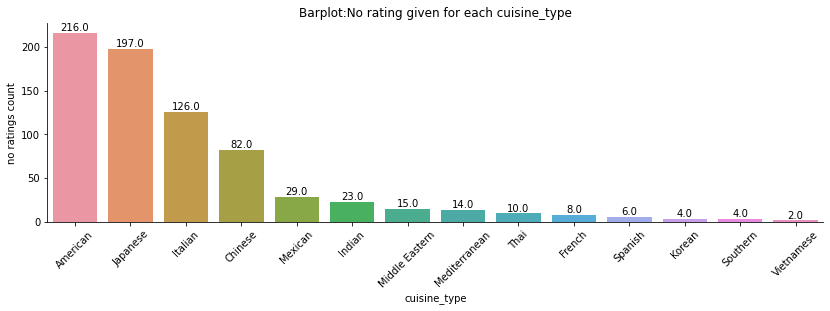

In [50]:
# Barchart of cuisine_type in relation to no rating count
no_rating_by_cuisine_df = df[df['rating_numerical'].isnull()].groupby('cuisine_type')['rating_numerical']\
                            .size()\
                            .sort_values(ascending=False)\
                            .reset_index(name='no ratings count')
# Calculate the % no ratings count to total no ratings
no_rating_by_cuisine_df['% of no ratings total'] = (no_rating_by_cuisine_df['no ratings count']/\
                                         no_rating_by_cuisine_df['no ratings count'].sum())*100

print('Distribution of cuisine orders')
print(no_rating_by_cuisine_df.sort_values(by='no ratings count', ascending=False))

# Output barchart of cuisine_type in relation to no ratings
output_pretty_barplot('Barplot:No rating given for each cuisine_type',\
                        no_rating_by_cuisine_df, 'cuisine_type', 'no ratings count',\
                        no_rating_by_cuisine_df['cuisine_type'].value_counts().index)

##### Observations:
- American cuisine had the highest number of no ratings with 216 which represents 29.348% of all the no ratings and 11.38% of all ratings.
- The top four cuisines with the highest no ratings are American, Japanese, Italian and Chinese.
- These top four cuisines comprise 84.38% of all the no ratings and 32.71% of all ratings.
- The top four no rating cuisines match exactly the top four most popular cuisines.
- A no rating may be indicative of food is acceptable (neither great or bad) from a customer standpoint and thus did not warrant a rating.

#### Lets investigate cuisine_type in relation to total_time

total_time stats by cuisine_type
                 count   mean   std    min    25%    50%    75%    max
cuisine_type                                                          
American       584.000 51.634 6.616 35.000 47.000 51.000 56.000 68.000
Japanese       470.000 51.643 6.993 36.000 47.000 52.000 56.000 68.000
Italian        298.000 52.050 6.764 35.000 47.250 53.000 56.000 67.000
Chinese        215.000 51.367 7.362 35.000 46.000 51.000 56.500 68.000
Mexican         77.000 51.117 5.892 36.000 48.000 51.000 55.000 65.000
Indian          73.000 51.192 6.521 36.000 47.000 51.000 56.000 65.000
Middle Eastern  49.000 50.755 7.221 36.000 47.000 53.000 56.000 67.000
Mediterranean   46.000 50.587 7.207 36.000 46.250 50.000 55.000 64.000
Thai            19.000 50.474 7.152 37.000 47.000 49.000 57.000 61.000
French          18.000 52.222 6.025 43.000 49.000 50.500 56.750 64.000
Southern        17.000 51.412 8.603 37.000 46.000 53.000 56.000 68.000
Korean          13.000 46.385 4.519 38.000 4

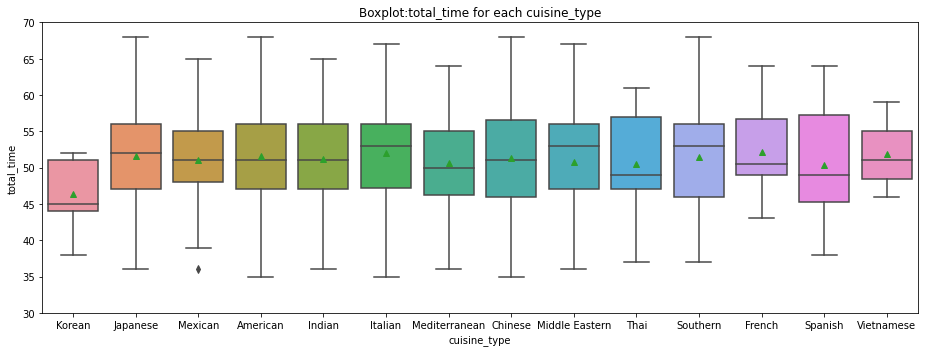

In [51]:
# output stats for total_time by cuisine_type
total_time_cuisine_stats = df.groupby('cuisine_type')['total_time'].describe()
print('total_time stats by cuisine_type')
print(total_time_cuisine_stats.sort_values(by='count', ascending=False))
            
# Boxplot of cuisine_type in relation to total_time
output_pretty_boxplot('Boxplot:total_time for each cuisine_type',df, \
                      x='cuisine_type', y='total_time', figsize=(13,5));
plt.ylim(30,70);

##### Observations:
- The slowest average total_time for food prep and delivery is 52.222 for French cuisine.
- The fastest average total_time for food prep and delivery is 46.385 for Korean cuisine.
- Mexican cuisine has an outlier for total_time
- The top five most popular cuisines (American,Japanese,Chinese,Italian and Mexican) have very similar means and medians for total time.


- American cuisine mean total_time is 51.634 which is equal to the median indicating the data is right skewed.
- Chinese cuisine mean total_time is 51.37 which is equal to the median indicating the data is right skewed.
- French cuisine mean total_time is 52.22 which is equal to the median indicating the data is right skewed.
- Indian cuisine mean total_time is 51.19 which is equal to the median indicating the data is right skewed.
- Italian cuisine mean total_time is 52.050 which is less than the median indicating the data is left skewed.
- Japanese cuisine mean total_time is 51.64 which is less than the median indicating the data is left skewed.
- Korean cuisine mean total_time is 46.38 which is equal to the median indicating the data is right skewed.
- Mediterranean cuisine mean total_time is 50.59 which is equal to the median indicating the data is right skewed.
- Mexican cuisine mean total_time is 51.12 which is equal to the median indicating the data is right skewed.
- Middle Eastern cuisine mean total_time is 50.76 which is less than the median indicating the data is left skewed.
- Southern cuisine mean total_time is 51.41 which is less than the median indicating the data is left skewed.
- Spanish cuisine mean total_time is 50.33 which is equal to the median indicating the data is right skewed.
- Thai cuisine mean total_time is 50.47 which is equal to the median indicating the data is right skewed.
- Vietnamese cuisine mean total_time is 51.86 which is equal to the median indicating the data is right skewed.

#### Lets investigate day_of_the_week in relation to delivery_time

Delivery time by weekend
count   1351.000
mean      22.470
std        4.629
min       15.000
25%       18.500
50%       22.000
75%       27.000
max       30.000
Name: delivery_time, dtype: float64

Delivery time by weekday
count   547.000
mean     28.340
std       2.891
min      24.000
25%      26.000
50%      28.000
75%      31.000
max      33.000
Name: delivery_time, dtype: float64


<Figure size 1440x360 with 0 Axes>

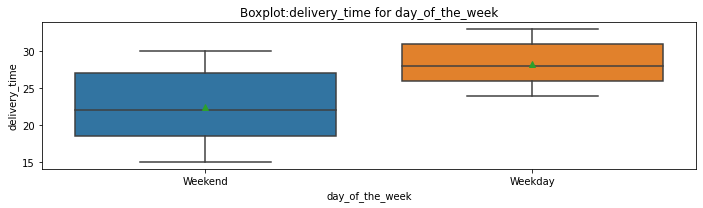

In [52]:
# Boxplot of day_of_the_week in relation to delivery_time
plt.figure(figsize=(20,5))
print('Delivery time by weekend')
print(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].describe())
print('\nDelivery time by weekday')
print(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].describe())
output_pretty_boxplot('Boxplot:delivery_time for day_of_the_week', df,\
                      x='day_of_the_week', y='delivery_time');

##### Observations:
- The mean delivery time for weekends is 22.47 which is slightly greater than the median suggesting the data is right skewed.
- The mean delivery time for weekdays is 28.34 which is slightly greater than the median suggesting the data is right skewed.
- Weekend average delivery time is 26.12% faster than on weekdays. A main reason could related to the traffic volume on the weekend could be lower then during weekdays.

#### Lets investigate day_of_the_week in relation to food_preparation_time

Food Preparation time by weekend
count   1351.000
mean      27.437
std        4.601
min       20.000
25%       23.000
50%       27.000
75%       31.000
max       35.000
Name: food_preparation_time, dtype: float64

Food Preparation time by weekday
count   547.000
mean     27.212
std       4.709
min      20.000
25%      23.000
50%      27.000
75%      31.000
max      35.000
Name: food_preparation_time, dtype: float64


<Figure size 1440x360 with 0 Axes>

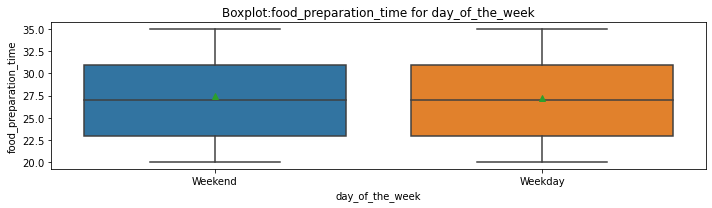

In [53]:
# Boxplot of day_of_the_week in relation to food_preparation_time
plt.figure(figsize=(20,5))
print('Food Preparation time by weekend')
print(df[df['day_of_the_week'] == 'Weekend']['food_preparation_time'].describe())
print('\nFood Preparation time by weekday')
print(df[df['day_of_the_week'] == 'Weekday']['food_preparation_time'].describe())
output_pretty_boxplot('Boxplot:food_preparation_time for day_of_the_week', df,\
                      x='day_of_the_week', y='food_preparation_time');

##### Observations:
- The mean food_preparation_time for weekends is 27.437 which is slightly greater than the median suggesting the data is right skewed.
- The mean food_preparation_time for weekdays is 27.212 which is slightly greater than the median suggesting the data is right skewed.
- Weekend average food_preparation_time is about the same for weekdays and weekends. There are many more orders over the weekend as compared to weekdays and the restaurants may have 
more staff on hand to prepare the food in a timely fashion.

#### Lets investigate day_of_the_week in relation to total_time

Total time by weekend
count   1351.000
mean      49.907
std        6.625
min       35.000
25%       45.000
50%       50.000
75%       55.000
max       65.000
Name: total_time, dtype: float64

Total time by weekday
count   547.000
mean     55.552
std       5.568
min      44.000
25%      51.000
50%      55.000
75%      59.500
max      68.000
Name: total_time, dtype: float64


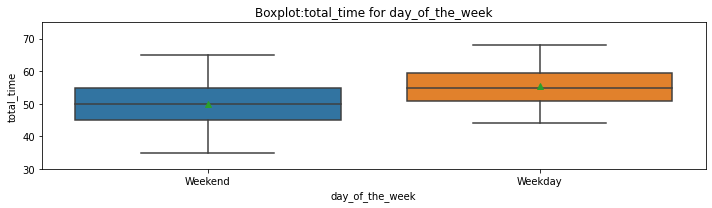

In [54]:
print('Total time by weekend')
print(df[df['day_of_the_week'] == 'Weekend']['total_time'].describe())
print('\nTotal time by weekday')
print(df[df['day_of_the_week'] == 'Weekday']['total_time'].describe())
# Boxplot of day_of_the_week in relation to total_time
output_pretty_boxplot('Boxplot:total_time for day_of_the_week',df,\
                      x='day_of_the_week', y='total_time');
plt.ylim(30,75);

##### Observations:
- The mean total_time for weekends is 49.907 which is slightly less than the median suggesting the data is left skewed.
- The mean total_time for weekdays is 55.552 which is slightly greater than the median suggesting the data right skewed.
- Weekend average total_time time is 11.30% faster than on weekdays.

#### Lets investigate total cost_of_the_orders by cuisine

Total revenue across all cuisines = 31314.82

      cuisine_type  total_cost_of_the_order  % of total
0         American                 9530.780      30.435
5         Japanese                 7663.130      24.471
4          Italian                 4892.770      15.624
1          Chinese                 3505.620      11.195
8          Mexican                 1303.850       4.164
3           Indian                 1235.140       3.944
9   Middle Eastern                  922.210       2.945
7    Mediterranean                  711.840       2.273
12            Thai                  364.950       1.165
2           French                  356.290       1.138
10        Southern                  328.110       1.048
11         Spanish                  227.930       0.728
6           Korean                  182.020       0.581
13      Vietnamese                   90.180       0.288


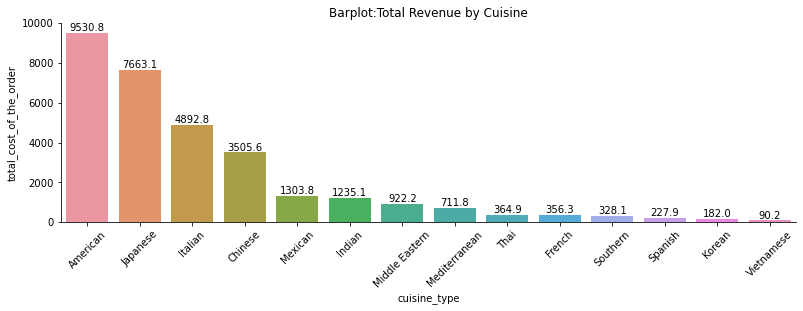

In [55]:
# Output cost of all orders an info on total cost_of_the_orders by cuisine
print("Total revenue across all cuisines = {:.2f}\n".format(cost_of_all_orders))
print(cost_of_the_order_by_cuisine_df)

# Barplot of total cost_of_the_orders by Cuisine
output_pretty_barplot('Barplot:Total Revenue by Cuisine',\
                        cost_of_the_order_by_cuisine_df, \
                        'cuisine_type', 'total_cost_of_the_order', \
                        cost_of_the_order_by_cuisine_df['cuisine_type'].value_counts().index);

##### Observations:
- The top five revenue producing cuisines are American, Japanese, Italian. Chinese and Mexican
- The American cuisine revenue of 9530.780 represents 30.435% of total revenue
- The top five revenue producing cuisines represent 85.88% of all revenue
- The bottom five revenue producing cuisines represent 3.783% of all revenue

#### Lets investigate rating_numerical in relation to cuisine_type

                 count  mean   std   min   25%   50%   75%   max
cuisine_type                                                    
American       368.000 4.299 0.748 3.000 4.000 4.000 5.000 5.000
Japanese       273.000 4.374 0.727 3.000 4.000 5.000 5.000 5.000
Italian        172.000 4.360 0.748 3.000 4.000 5.000 5.000 5.000
Chinese        133.000 4.338 0.768 3.000 4.000 5.000 5.000 5.000
Indian          50.000 4.540 0.676 3.000 4.000 5.000 5.000 5.000
Mexican         48.000 4.417 0.710 3.000 4.000 5.000 5.000 5.000
Middle Eastern  34.000 4.235 0.699 3.000 4.000 4.000 5.000 5.000
Mediterranean   32.000 4.219 0.870 3.000 3.000 4.500 5.000 5.000
Southern        13.000 4.308 0.630 3.000 4.000 4.000 5.000 5.000
French          10.000 4.300 0.823 3.000 4.000 4.500 5.000 5.000
Korean           9.000 4.111 0.782 3.000 4.000 4.000 5.000 5.000
Thai             9.000 4.667 0.500 4.000 4.000 5.000 5.000 5.000
Spanish          6.000 4.833 0.408 4.000 5.000 5.000 5.000 5.000
Vietnamese       5.000 4.

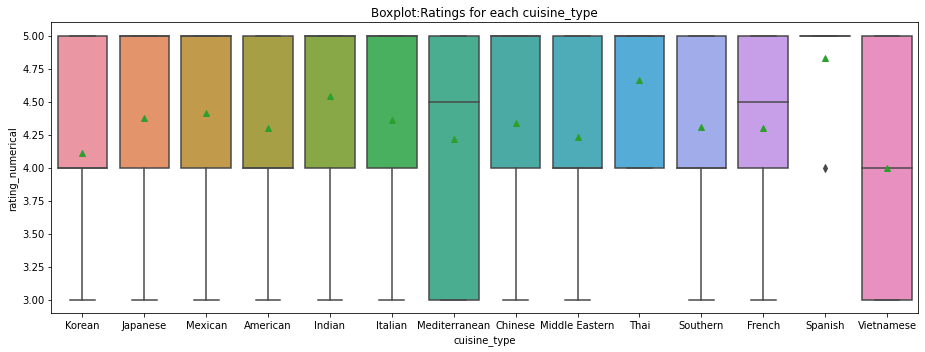

In [56]:
# output stats for rating_numerical by cuisine_type
rating_numerical_stats = df.groupby('cuisine_type')['rating_numerical'].describe()
print(rating_numerical_stats.sort_values(by='count', ascending=False))

# Boxplot of cuisine_type in relation to rating_numerical
output_pretty_boxplot('Boxplot:Ratings for each cuisine_type', df, \
                      x='cuisine_type', y='rating_numerical', figsize=(13,5));

cuisine_type    rating_numerical
American        5.000               174
                4.000               130
                3.000                64
Chinese         5.000                69
                4.000                40
                3.000                24
French          5.000                 5
                4.000                 3
                3.000                 2
Indian          5.000                32
                4.000                13
                3.000                 5
Italian         5.000                90
                4.000                54
                3.000                28
Japanese        5.000               142
                4.000                91
                3.000                40
Korean          4.000                 4
                5.000                 3
                3.000                 2
Mediterranean   5.000                16
                3.000                 9
                4.000                 7
Mexican

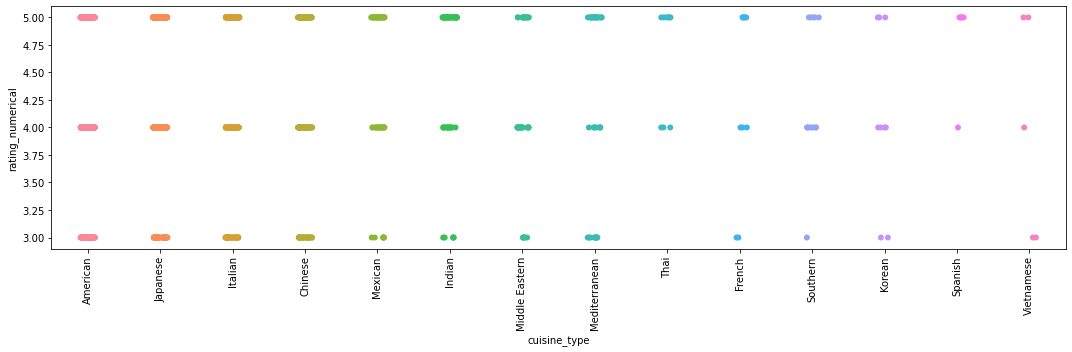

In [57]:
# output stats for cuisine_type in relation to rating_numerical
rating_by_cuisine_type_stats = df.groupby('cuisine_type')\
                                        ['rating_numerical']\
                                        .value_counts()\

print(rating_by_cuisine_type_stats)
plt.figure(figsize=(15,5));
sns.stripplot(data=df,x='cuisine_type',y='rating_numerical', s=6, order=df['cuisine_type'].value_counts().index);
plt.xticks(rotation=90);

##### Observations:
- The top rated cuisine is Spanish with 4.83.
- For the most popular cuisines of American 4.299, Japanese 4.374, Italian 4.360 and Chinese 4.338 only Japanese appeared in the top 5 ratings for cuisines.
- 5 rating is the most popular rating except for Korean, Middle Eastern, Southern and Vietnamese.
- 4 rating is the second most popular rating except for Korean, Middle Eastern, Southern and Vietnamese.
- Thai, French, Southern, Korean, Spanish and Vietnamese have a small amount of orders.
- Thai and Spanish have no 3 ratings.


- American cuisine mean rating is 4.299 which is less than the median indicating the data is right skewed.
- Japanese cuisine mean rating is 4.37 which is less than the median indicating the data is left skewed.
- Chinese cuisine mean rating is 4.34 which is less than the median indicating the data is left skewed.
- Italian cuisine mean rating is 4.36 which is less than the median indicating the data is left skewed.
- Mexican cuisine mean rating is 4.417 which is less than the median indicating the data is left skewed.
- Indian cuisine mean rating is 4.54 which is less than the median indicating the data is left skewed.
- Middle Eastern cuisine mean rating is 4.235 which is greater than the median indicating the data is right skewed.
- Mediterranean cuisine mean rating is 4.219 which is less than the median indicating the data is left skewed.
- Thai cuisine mean rating is 4.67 which is less than the median indicating the data is left skewed.
- French cuisine mean rating is 4.30 which is less than the median indicating the data is left skewed.
- Southern cuisine mean rating is 4.308 which is greater than the median indicating the data is right skewed.
- Korean cuisine mean rating is 4.11 which is greater than the median indicating the data is right skewed.
- Spanish cuisine mean rating is 4.83 which is less than the median indicating the data is left skewed.
- Vietnamese cuisine mean rating is 4.00 which is equal to the median indicating the data is symmetrical.

#### Lets investigate rating in relation to delivery_time and day_of_the_week

Weekend rating stats by delivery_time
            count   mean   std    min    25%    50%    75%    max
rating                                                           
3         125.000 23.024 4.606 15.000 20.000 23.000 27.000 30.000
4         277.000 22.181 4.529 15.000 18.000 22.000 26.000 30.000
5         420.000 22.431 4.595 15.000 18.000 23.000 26.000 30.000
Not given 529.000 22.522 4.713 15.000 18.000 22.000 27.000 30.000

Weekday rating stats by delivery_time
            count   mean   std    min    25%    50%    75%    max
rating                                                           
3          63.000 27.603 2.949 24.000 25.000 27.000 30.000 33.000
4         109.000 28.156 2.852 24.000 26.000 28.000 31.000 33.000
5         168.000 28.667 2.761 24.000 26.000 29.000 31.000 33.000
Not given 207.000 28.396 2.970 24.000 26.000 28.000 31.000 33.000


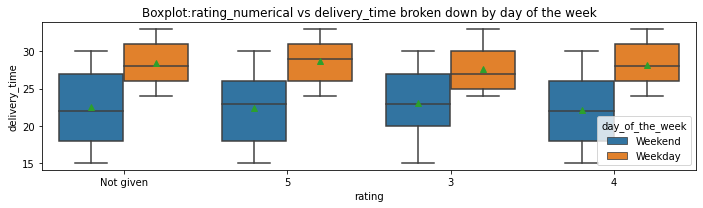

In [58]:
# output stats for delivery_time for weekend orders
weekend_rating_delivery_time_stats = df[df['day_of_the_week'] == 'Weekend'].groupby('rating')\
                                        ['delivery_time'].describe()
print('Weekend rating stats by delivery_time')

print(weekend_rating_delivery_time_stats)

# output stats for delivery_time for weekday orders
weekday_rating_delivery_time_stats = df[df['day_of_the_week'] == 'Weekday'].groupby('rating')\
                                        ['delivery_time'].describe(include='all')
print('\nWeekday rating stats by delivery_time')
print(weekday_rating_delivery_time_stats)

# Boxplot for rating_numerical in relation to delivery_time with a hue of day_of_the_week
output_pretty_boxplot('Boxplot:rating_numerical vs delivery_time broken down by day of the week', df,\
                      x='rating',y='delivery_time',hue='day_of_the_week');

##### Observations:
- mean delivery_time is 19.88% slower for ratings of 3 for weekdays as compared to weekends.
- mean delivery_time is 26.9% slower for ratings of 4 for weekdays as compared to weekends.
- mean delivery_time is 27.8% slower for ratings of 5 for weekdays as compared to weekends.
- mean delivery_time is 26.08% slower for ratings of Not given for weekdays as compared to weekends.


- Minimum delivery_time is 15 and the maximum is 30 for weekends across all ratings.
- Minimum delivery_time is 24 and the maximum is 33 for weekdays across all ratings.


- For weekdays the Not Given rating mean is 28.396 which is greater then the median implying the data is right skewed.
- For weekdays the 3 rating mean is 27.603 which is greater then the median implying the data is right skewed.
- For weekdays the 4 rating mean is 28.156 which is greater then the median implying the data is right skewed.
- For weekdays the 5 rating mean is 28.667 which is less then the median implying the data is left skewed.


- For weekends the Not Given rating mean is 22.522 which is greater then the median implying the data is right skewed.
- For weekends the 3 rating mean is 23.024 which is greater then the median implying the data is right skewed.
- For weekends the 4 rating mean is 22.181 which is less then the median implying the data is left skewed.
- For weekends the 5 rating mean is 22.522 which is greater then the median implying the data is right skewed.

#### Lets investigate rating in relation to food_preparation_time and day_of_the_week

Weekend rating stats by food_preparation_time
            count   mean   std    min    25%    50%    75%    max
rating                                                           
3         125.000 27.616 4.780 20.000 24.000 27.000 32.000 35.000
4         277.000 27.448 4.642 20.000 23.000 27.000 32.000 35.000
5         420.000 27.364 4.630 20.000 23.000 28.000 31.000 35.000
Not given 529.000 27.446 4.526 20.000 24.000 27.000 31.000 35.000

Weekday rating stats by food_preparion_time
            count   mean   std    min    25%    50%    75%    max
rating                                                           
3          63.000 27.063 4.762 20.000 23.000 27.000 31.000 35.000
4         109.000 27.266 4.586 20.000 23.000 27.000 31.000 35.000
5         168.000 27.333 4.863 20.000 23.000 27.000 32.000 35.000
Not given 207.000 27.130 4.660 20.000 23.000 27.000 31.000 35.000


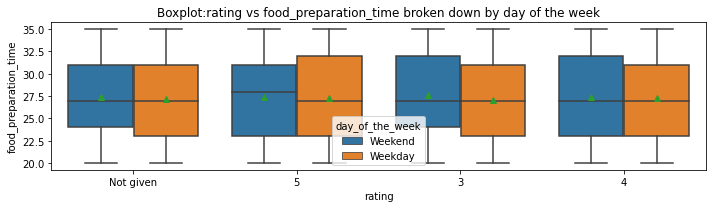

In [59]:
# output stats for food_preparation_time for weekend orders
weekend_rating_foodprep_time_stats = df[df['day_of_the_week'] == 'Weekend'].groupby('rating')\
                                        ['food_preparation_time'].describe()
print('Weekend rating stats by food_preparation_time')
print(weekend_rating_foodprep_time_stats)

# output stats for food_preparation_time for weekday orders
weekday_rating_foodprep_time_stats = df[df['day_of_the_week'] == 'Weekday'].groupby('rating')\
                                        ['food_preparation_time'].describe()
print('\nWeekday rating stats by food_preparion_time')
print(weekday_rating_foodprep_time_stats)

# Boxplot for rating in relation to food_preparation_time with a hue of day_of_the_week
output_pretty_boxplot('Boxplot:rating vs food_preparation_time broken down by day of the week',df,\
                      x='rating',y='food_preparation_time', hue='day_of_the_week');

##### Observations:
- Overall the food_preparation time for weekends and weekdays is very similar


- mean food_preparation_time is 2.04% slower for ratings of 3 for weekend as compared to weekdays
- mean food_preparation_time is .06% slower for ratings of 4 for weekend as compared to weekdays
- mean food_preparation_time is .01% slower for ratings of 5 for weekend as compared to weekdays
- mean food_preparation_time is 1.1% slower for ratings of Not given for weekend as compared to weekdays


- Minimum food_preparation_time is 20 and the maximum is 35 for weekends and weekdays across all ratings


- For weekdays the Not Given rating mean is 27.130 which is greater then the median implying the data is right skewed.
- For weekdays the 3 rating mean is 27.063 which is greater then the median implying the data is right skewed.
- For weekdays the 4 rating mean is 27.266 which is greater then the median implying the data is right skewed.
- For weekdays the 5 rating mean is 27.333 which is greater then the median implying the data is right skewed.


- For weekends the Not Given rating mean is 27.446 which is greater then the median implying the data is right skewed.
- For weekends the 3 rating mean is 27.616 which is greater then the median implying the data is right skewed.
- For weekends the 4 rating mean is 27.448 which is greater then the median implying the data is right skewed.
- For weekends the 5 rating mean is 27.364 which is greater then the median implying the data is right skewed.

#### Lets investigate rating in relation to total_time and day_of_the_week

Weekend rating stats by total_time
            count   mean   std    min    25%    50%    75%    max
rating                                                           
3         125.000 50.640 6.487 35.000 46.000 51.000 55.000 65.000
4         277.000 49.628 6.491 36.000 45.000 50.000 54.000 65.000
5         420.000 49.795 6.610 35.000 45.000 50.000 55.000 65.000
Not given 529.000 49.968 6.742 35.000 45.000 50.000 55.000 65.000

Weekday rating stats by total_time
            count   mean   std    min    25%    50%    75%    max
rating                                                           
3          63.000 54.667 5.448 44.000 51.000 55.000 58.000 67.000
4         109.000 55.422 5.218 46.000 52.000 54.000 59.000 68.000
5         168.000 56.000 5.606 45.000 52.000 55.000 60.000 68.000
Not given 207.000 55.527 5.751 44.000 51.000 55.000 60.000 68.000


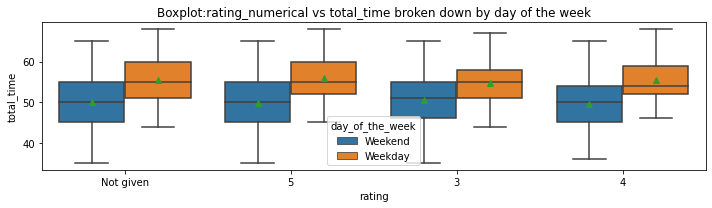

In [60]:
# output stats for total_time for weekend orders
weekend_rating_total_time_stats = df[df['day_of_the_week'] == 'Weekend'].groupby('rating')['total_time']\
                            .describe()
print('Weekend rating stats by total_time')
print(weekend_rating_total_time_stats)

# output stats for total_time for weekday orders
weekday_rating_total_time_stats = df[df['day_of_the_week'] == 'Weekday'].groupby('rating')['total_time']\
                            .describe()
print('\nWeekday rating stats by total_time')
print(weekday_rating_total_time_stats)

# Boxplot for rating in relation to total_time with a hue of day_of_the_week
output_pretty_boxplot('Boxplot:rating_numerical vs total_time broken down by day of the week',df,\
                      x='rating',y='total_time', hue='day_of_the_week');

##### Observations:
- mean total_time is 7.95% slower for ratings of 3 for weekdays as compared to weekends
- mean total_time is 11.67% slower for ratings of 4 for weekdays as compared to weekends
- mean total_time is 12.46% slower for ratings of 5 for weekdays as compared to weekends
- mean total_time is 11.12% slower for ratings of Not given for weekdays as compared to weekends


- For weekends the Not Given the mean total_time is 49.968 which is greater then the median implying the data is left skewed.
- On weekends for a 3 rating the mean total_time was 50.64 which is less then the median indicating left skewed data
- On weekends for a 4 rating the mean total_time was 49.628 which is less then the median indicating left skewed data
- On weekends for a 5 rating the mean total_time was 49.795 which is less then the median indicating left skewed data

- For weekdays the Not Given the mean total_time is 55.527 which is greater then the median implying the data is right skewed.
- On weekdays for a 3 rating the mean total_time was 54.667 which is less then the median indicating left skewed data
- On weekdays for a 4 rating the mean total_time was 55.422 which is greater then the median indicating right skewed data
- On weekdays for a 5 rating the mean total_time was 56 which is greater then the median indicating right skewed data


#### Lets investigate rating in relation to total_time

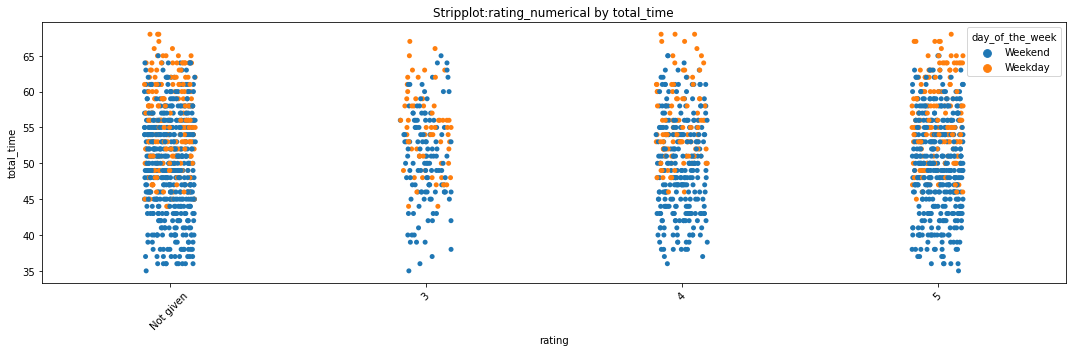

In [61]:
# Output a stripplot of rating in relation to total_time
plt.figure(figsize=(15,5));
sns.stripplot(data=df,x='rating',y='total_time', hue='day_of_the_week', jitter=True,\
             order=['Not given','3','4','5']);
plt.title('Stripplot:rating_numerical by total_time');
plt.xticks(rotation=45);

##### Observations:
- Logically I would expect to see a negative correlation between total_time and rating but this plot clearly shows that is not the case.
- Likely customers weigh the cuisine_type and restaurant much more importantly than how long it takes to receive the food once its been ordered.

#### Lets investigate order count in relation to the % of 3 ratings

          restaurant_name  count  3 rating count  % of 3 ratings
        Blue Ribbon Sushi    119              16          13.445
                     Parm     68               9          13.235
         RedFarm Broadway     59               8          13.559
           RedFarm Hudson     55               9          16.364
                 Rubirosa     37               5          13.514
Blue Ribbon Sushi Izakaya     29               4          13.793
               Bareburger     27               4          14.815
        Jack's Wife Freda     25               5          20.000
            P.J. Clarke's     15               2          13.333
              J. G. Melon     15               2          13.333
           Osteria Morini     14               2          14.286
   Empanada Mama (closed)     13               2          15.385
                Cafeteria      9               3          33.333
         Pepe Rosso To Go      7               2          28.571
            Waverly Diner

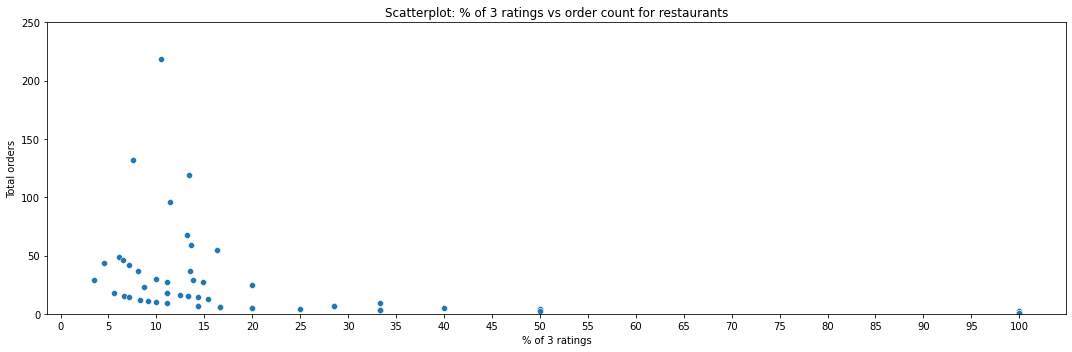

In [62]:
# Group the dataframe by restaurant_name and get the number of ratings
restaurant_rating_counts_df = df.groupby(['restaurant_name'])['rating']\
                        .size().reset_index(name='count')\
                        .sort_values(by='count',ascending=False).copy()

# Let's calculate the # of 3 ratings per restaurant and then the % of 3 ratings per restaurant
ratings3_counts = []
for r in restaurant_rating_counts_df['restaurant_name']:
    ratings3_counts.append(df[(df['restaurant_name'] == r) & (df['rating'] == '3')]['rating'].count())

restaurant_rating_counts_df['3 rating count'] = ratings3_counts
restaurant_rating_counts_df['% of 3 ratings'] = (restaurant_rating_counts_df['3 rating count']\
                                                    /restaurant_rating_counts_df['count'])*100

print(restaurant_rating_counts_df[restaurant_rating_counts_df['% of 3 ratings'] > 13]\
      .sort_values(by='count', ascending=False)\
      .head(20)\
      .to_string(index=False))
plt.figure(figsize=(15, 5));
ax = sns.scatterplot(data=restaurant_rating_counts_df[restaurant_rating_counts_df['% of 3 ratings'] > 0],\
                x='% of 3 ratings', y='count');
plt.title('Scatterplot: % of 3 ratings vs order count for restaurants');
ax.set(ylabel='Total orders');
ax.set_xticks(range(0, 101,5));
plt.ylim(0, 250);
plt.show();

##### Observations:
- There appears to be a downward trend of orders as the % of 3 ratings is greater than 13.

#### Lets investigate order count in relation to customer_id

    order count  number of customers  % of total
0             1                  784       0.653
1             2                  267       0.223
2             3                   83       0.069
3             4                   33       0.028
4             5                   19       0.016
5             6                    6       0.005
6             7                    4       0.003
7             8                    1       0.001
8             9                    1       0.001
9            10                    1       0.001
10           13                    1       0.001

Average number of orders per customer is 0.63


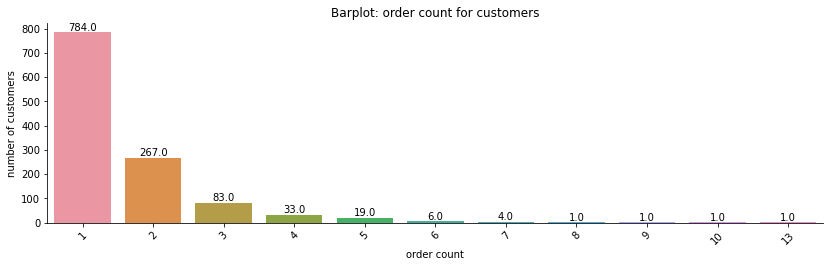

In [63]:
# Group by customer_id to get order count
customer_orders_overall_df = df.groupby(['customer_id'])\
                        .size().reset_index(name='order count')\
                        .sort_values(by='order count',ascending=False).copy()
# Now lets group by order count to find out how many members are in the order count buckets
customer_orders_grouped_df = customer_orders_overall_df.groupby('order count')\
                        .size().reset_index(name='number of customers')\
                        .sort_values(by='number of customers',ascending=False).copy()
customer_orders_grouped_df['% of total'] = customer_orders_grouped_df['number of customers']/unique_customers
print(customer_orders_grouped_df)

print('\nAverage number of orders per customer is {:.2f}'.format(unique_customers/df_shape[0]))
output_pretty_barplot('Barplot: order count for customers',customer_orders_grouped_df, x='order count', \
                      y='number of customers');



##### Observations:
- The average number of orders per customer is 0.63.
- 65.3% of your customers have only placed 1 order. 
- Only 12.5% of your customers have placed more then two orders.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [64]:
# Filter out the Not Given ratings, group by restaurant name then use agg method to calculate group 
# count and average rating
promotional_restaurants = df[df['rating_numerical'].isnull() == False].groupby('restaurant_name')\
                                .agg({'restaurant_name':'size', 'rating_numerical':'mean'})\
                                .rename(columns={'restaurant_name':'count','rating_numerical':'average_rating'}) \
                                .reset_index()
# Show only restaurant with over 50 orders and an average rating > 4
promotional_restaurants[(promotional_restaurants['count'] > 50) &\
                        (promotional_restaurants['average_rating'] > 4)].sort_values(by='count',ascending=False)                                                                                                                           

,restaurant_name,count,average_rating
117,Shake Shack,133,4.278
132,The Meatball Shop,84,4.512
17,Blue Ribbon Sushi,73,4.219
16,Blue Ribbon Fried Chicken,64,4.328


#### Observations:
- We found four restaurants with an order count greater then 50 and an average rating greater then 4
- The top restaurant in terms of order count is Shake Shack
- The restaurant in our list with the lowest order count is Blue Ribbon Fried Chicken with 64
- The top restaurant in terms of ratings is The Meatball shop with 4.512
- The restaurant in our list with the lowest rating is Blue Ribbon Sushi with a 4.219

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [65]:
# 25% revenue for orders over 20
twenty_five_percent_revenue = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * .25
print('Revenue from orders over 20 is {:.2f}'.format(twenty_five_percent_revenue))
# 15% revenue for orders greater then 5 and less then  or equal to 20
fifteen_percent_revenue = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]\
                            ['cost_of_the_order'].sum() * .15

print('Revenue from orders over 5 and less then or equal to 20 is {:.2f}'.format(fifteen_percent_revenue))

# Total revenue is fifteen_percent_revenue+twenty_five_percent_revenue
revenue = fifteen_percent_revenue+twenty_five_percent_revenue
print('Total revenue is {:.2f}'.format(revenue))

Revenue from orders over 20 is 3688.73
Revenue from orders over 5 and less then or equal to 20 is 2477.58
Total revenue is 6166.30


#### Observations:
- 25% revenue is 3688.73
- 15% revenue is 2477.58
- Total revenue is 6166.30

#### Lets take a look at an alternate surcharge model given cost_of_the_order bin frequency

In [66]:
# Find the revenue that is not included in surcharges
uncaptured_revenue = df[(df['cost_of_the_order'] < 5)]\
                            ['cost_of_the_order'].sum()

print('Uncaptured from orders less than 5 is {:.2f}'.format(uncaptured_revenue))

# If we were to adjust the surcharge to capture uncaptured revenue and apply a surcharge based on the the 
# frequency in the cost_the_order_bins
lt_5_revenue = df[df['cost_of_the_order'] < 5]['cost_of_the_order'].sum() * .12
between_5_10_revenue = df[(df['cost_of_the_order'] >= 5) & (df['cost_of_the_order'] <= 10)]\
                        ['cost_of_the_order'].sum() * .17
between_1001_15_revenue = df[(df['cost_of_the_order'] > 10) & (df['cost_of_the_order'] <= 15)]\
                        ['cost_of_the_order'].sum() * .15
between_1501_20_revenue = df[(df['cost_of_the_order'] > 15) & (df['cost_of_the_order'] <= 20)]\
                        ['cost_of_the_order'].sum() * .19
gt_20_revenue  = df[(df['cost_of_the_order'] > 20)]\
                        ['cost_of_the_order'].sum() * .25

revised_revenue = lt_5_revenue+between_5_10_revenue+between_1001_15_revenue+between_1501_20_revenue+gt_20_revenue
print('\nIf we were to apply updated surcharges based on popularity of the cost_of_the_order_bins revenue would be {}'\
      .format(revised_revenue))
print('Revised revenue would {:.2f}% higher than revenue based on current surcharges'\
      .format(  ((revised_revenue-revenue)/revenue)*100))

Uncaptured from orders less than 5 is 42.74

If we were to apply updated surcharges based on popularity of the cost_of_the_order_bins revenue would be 6458.5226
Revised revenue would 4.74% higher than revenue based on current surcharges


#### Observations:
- There is uncaptured revenue for orders less than 4 of 42.74
- If we apply the following surcharge pattern based on frequency of the cost_of_the_order_bins we can increase revenue for Food Hub by 4.74%:
    * 12% for less than 5.
    * 17% for greater than 5 and less than or equal to 10.
    * 15% for greater than 10 and less than or equal to 15.
    * 19% for greater than 15 and less than or equal to 20.
    * 25% for orders greater than 20.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [67]:
# Find the number of orders whose total_time exceeds 60
orders_taking_over_60_mins = df[df['total_time'] > 60].shape[0]
percentage_of_orders_taking_over_60_mins = (orders_taking_over_60_mins / df_shape[0]) *100
print('Number of orders taking longer then 60 minutes is {} which represents {:.2f}% of total orders'\
      .format(orders_taking_over_60_mins, percentage_of_orders_taking_over_60_mins))

Number of orders taking longer then 60 minutes is 200 which represents 10.54% of total orders


#### Observations:
- 200 orders took longer then 60 minutes to prepare and deliver which is 10.54% of the total orders

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [68]:
# Calulate the average weekday and weekend delivery time
print('Average delivery time is {:.2f}'.format(average_delivery_time))
average_weekend_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print('Average weekend delivery time is {:.2f}'\
      .format(average_weekend_delivery_time))

average_weekday_delivery_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print('Average weekday delivery time is {:.2f}'\
      .format(average_weekday_delivery_time))

improvement = ((average_delivery_time-average_weekend_delivery_time)/average_weekend_delivery_time) * 100
print('Average weekend delivery time is {:.2f}% faster then overall average delivery time'.format(improvement))

improvement = ((average_weekday_delivery_time-average_weekend_delivery_time)/average_weekend_delivery_time) * 100
print('Average weekend delivery time is {:.2f}% faster then average weekday delivery time'\
      .format(improvement))

Average delivery time is 24.16
Average weekend delivery time is 22.47
Average weekday delivery time is 28.34
Average weekend delivery time is 7.53% faster then overall average delivery time
Average weekend delivery time is 26.12% faster then average weekday delivery time


#### Observations:
- Average weekend delivery time of 22.47 is less then the overall average delivery time and weekday delivery time
- Average weekday delivery time of 28.34 is greater then overall average delivery time
- Average weekend average delivery time is 7.53% faster then overall average delivery time
- Average weekend average delivery time is 26.12% faster then average weekday delivery time

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* 'The Meatball Shop' restaurant is listed under both Italian and American as cuisine_type and should corrected.
* The top twenty most frequent orderers had 134 of the total orders which is 7.06% of all the orders
* The top ten restaurants in terms of orders have 46.69% of the total orders
    1. Shake Shack
    2. The Meatball Shop    
    3. Blue Ribbon Sushi     
    4. Blue Ribbon Fried Chicken
    5. Parm      
    6. RedFarm Broadway      
    7. RedFarm Hudson      
    8. TAO     
    9. Han Dynasty     
    10. Blue Ribbon Sushi Bar & Grill
    
    Three of the top ten appear to be from the Blue Ribbon restaurant franchise and seven of the top ten have multiple    
    repeat customers who have come more than twice.
    

* The cuisine_type for the top ten restaurants are comprised of 3 Japanese, 3 Chinese, 2 American and 2 Italian.
* Top four cuisine_types are American,Japanese,Italian and Chinese with American comprising 30.8% of orders and the top four cuisines comprising 82.6% of total orders.
* Orders on the weekends comprise 71.2% of all orders and weekend orders surpass weekday orders by 146.98%
* 38.8% of all ratings were Not given likely because the food/delivery experience was adequate (neither great or bad). Customers should be encouraged to provide ratings in order to lower ratings of Not given.
* Orders that were in the 10.01-15 range comprised 32.4% of all orders and orders between 5 and 20 comprised 70.28% of all orders.
* Most popular cuisine on weekends is American with 30.718% of orders and during weekdays American with 30.896% of orders.
* Southern, Spanish, Thai, Vietnamese, French and Korean are the worst performing cuisines in terms of number or orders and revenue on weekends and weekdays.
* Weekend average delivery time is 26.12% faster than on weekdays. A main reason could related to the traffic volume on the weekend could be lower then during weekdays.
* The top rated cuisine is Spanish with 4.83 of the most popular cuisines of American 4.299, Japanese 4.374, Italian 4.36 and Chinese 4.338 only Japanese appeared in the top five ratings for cuisines.
* 10.54% of the total orders took longer then 1 hour to prepare and deliver. No patterns were seen in terms of slow delivery times impacting ratings directly. It is likely customers weigh the cuisine_type and restaurant much more importantly than how long it takes to receive the food once its been ordered. 
* There appears to be a downward trend of restaurant orders as the % of 3 ratings is greater than 13%.
* There are seven restaurants that have more then two repeat customers that have frequented the restaurants multiple times
    1. Shake Shack                      
    2. Blue Ribbon Sushi                
    3. Blue Ribbon Fried Chicken        
    4. Blue Ribbon Sushi Bar & Grill    
    5. The Meatball Shop                
    6. Nobu Next Door                   
    7. RedFarm Hudson

### Recommendations:
* The American cuisine has 41 restaurants representing 23.034% of all restaurants although American brings in 30.4% of the total restaurant revenue. Increase the number of American restaurants to more closely align with the restaurant revenue percentage.
* The Japanese cuisine has 29 restaurants representing 16.292% of all restaurants although Japanese brings in 24.5% of the total restaurant revenue. Increase the number of Japanese restaurants to more closely align with the restaurant revenue percentage.
* Top four cuisine_types are American,Japanese,Italian and Chinese bringing in 82.561% of total orders while the lowest five cuisines generate 3.783% of total orders. The bottom five cuisines should be minimized or removed so that more focus and restaurant options can be applied to the top four cuisines. 
* Employ a revised surcharge model based on frequency of the cost_of_the_order_bins which will increase revenue for Food Hub by 4.74%:
    * 12% for less than 5
    * 17% for greater than 5 and less than or equal to 10
    * 15% for greater than 10 and less than or equal to 15
    * 19% for greater than 15 and less than or equal to 20
    * 25% for orders greater than 20
* 65.3% of you customers have only one order placed and the average number of orders per customer is .63. Offers should be provided to increase this average and incent these customers to order more often. 
* Only 12.5% of your customers have placed more then two orders and your top twenty customers made 7.06% of the total orders. Frequent customer incentives should be offered (e.g. 2, 5, 15, 30 orders etc.) to increase the percentage of customers in this group.


### Further analysis that can be done:
* It would be useful if possible to gather actual date info for order placement to investigate time trends in the dataset. In addition any rating comments from a prescribed list of options could offer more insight into ratings.
* Further investigation is warranted for restaurant's that pass the threshold of 13% for percentage of 3 ratings overall.
* Further investigation should be done on identifying root causes of Not rating given ratings given its rather high occurrence 38.8%.

---